# Seattle AirBnB Analysis

#### The dataset used was the AirBnB Seattle dataset.  

#### Data Analysis has been done from the perspective of a prospective host who wishes to rent an AirBnb to earn revenue. The host wishes to understand all which is neccassry or contributes in becoming a successful airBnB host which means having a high rating as well as a high revenue turnover.  

**The three fundermental questions that we hope to anwser through this dataset include:**

1. Which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Is there any correlation between one amenity and the other, if so how strong? 

2. What are the general characterstics of AirBnBs and their hosts with a higher rating. 

3. How do the prices and the number of bookings fluctuate with regards to time. What are the trends observed within the airBnBs of the three different categories. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./listings.csv')

## Data Understanding 

#### The below cell was used to run commands which helped in understanding data. They included the following(commented coloumns)

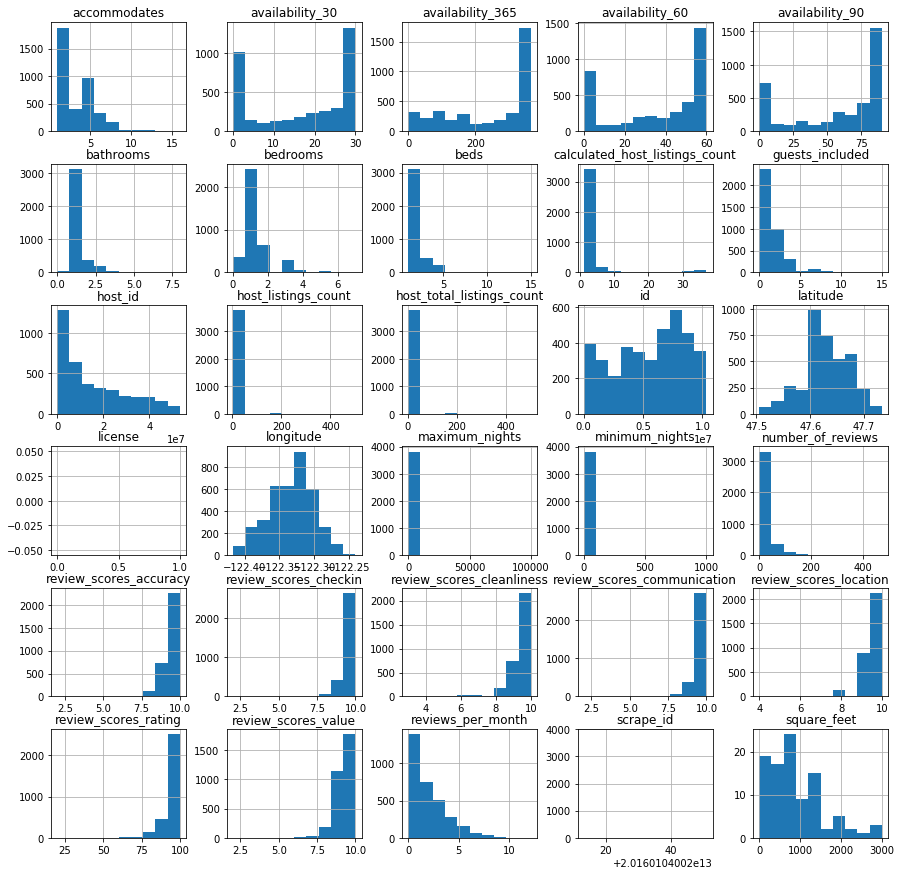

In [3]:
# Uncomment to run commands 
# --------------------------------------------------------------------
# df.head()
# df.shape
# df.info()
# df.describe()
# df.columns
# df.dtypes
df.hist(figsize=(15,15));

## Data Preperation 
<hr>

### Coloumns to be removed:

**Redundant columns with no use in analysis:**  
1. **host_url, medium_url, host_thumbnail_url,  thumbnail_url   picture_url , host_picture_url ,  listing_url , xl_picture_url:**  These URLS had no use in data analyis
2. **space ,  summary ,  notes ,  neighborhood_overview ,  description ,  experiences_offered:**  These features consisted on extensive descrptive paragraphs to describe the listing and its features which had no use in the data analysis process.  
3. **street ,  transit ,  latitude ,  zipcode ,    state ,   scrape_id ,  country_code ,  longitude , country ,  host_about:** All these details were covered in the address and city coloum. A micro analysis of the streets and specific co ordinates would not be done. The state and country details aren t needed since this dataset is limited to Seattle, Washington, USA.  


In [4]:
df = df[['id', 'last_scraped', 'name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time',
         'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
         'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
         'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'market', 'smart_location', 'is_location_exact',
         'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
         'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
         'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 
         'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'first_review', 'last_review',
         'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license',
         'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
         'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']]

### Examine rows and clean rows with NaN values

In [5]:
#Find coloumns with missing values > 80 % 
print("Columns with missing values > 80% :", df.columns[df.isnull().sum() > 0.80 * df.shape[0]].tolist())
#Find coloumns with missing values > 80 % 
print("Columns with missing values > 50% :", df.columns[df.isnull().sum() > 0.50 * df.shape[0]].tolist())

Columns with missing values > 80% : ['square_feet', 'license']
Columns with missing values > 50% : ['square_feet', 'monthly_price', 'security_deposit', 'license']


**Drop all the coloumn values > 50%** 

In [6]:
df.drop(columns= ['square_feet', 'monthly_price', 'security_deposit', 'license'], inplace=True)

### Examine coloumns with similar values and remove them. 


In [7]:
# Coloums with similar values 
x = df.nunique() == 1
similar_cols_vals = (x[ x == True].keys().tolist())
print('Columns with similar values: ', similar_cols_vals)

Columns with similar values:  ['last_scraped', 'market', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']


In [8]:
#drop these coloumns
df.drop(columns=similar_cols_vals, inplace=True)
# Since neoghnourhood cleansed already exists which contains cleaned data 
df.drop(columns='neighbourhood', inplace=True)

### Split amenities feature coloumn into multiple coloumns, each with a truth value of weather that specific feature is present in the datapoint.
<hr>

#### Use Regex to remove unneccassry grammer found in the string. 

In [9]:
# Use Regex to remove unneccassry grammer found in the string. 
df['amenities'] = df['amenities'].str.replace(pat='{', repl='')
df['amenities'] = df['amenities'].str.replace(pat='"', repl='')
df['amenities'] = df['amenities'].str.replace(pat='}', repl='')

#### Split feature into multiple features(amenities)

In [10]:
amenities_values = df.amenities
newarray = list()
for row in amenities_values:
    row = row.split(',')
    for i in row:
        newarray.append(i)
amenities_values = set(newarray)

#### Merge the obtained amenities dataframe with the main dataframe(df)

In [11]:
df_amen = pd.DataFrame(df[['id','amenities']])

In [12]:
df_amen = df_amen.reindex(columns=[*df_amen.columns.tolist(), *amenities_values], fill_value=0)

#### One hot encoditng for amenities

In [13]:
for index, row in df_amen.iterrows():
    amenities = []
    amenities.clear()
    amenities = row['amenities'].rsplit(',')
    for vals in amenities:
        df_amen.at[index, vals] = 1
print('Complete.')

Complete.


#### Drop amenities feature coloumn and empty coloumn.

In [14]:
df_amen.drop(columns=['amenities', ''], inplace=True)

In [15]:
df_amen.head(2)

,id,First Aid Kit,Smoking Allowed,Dog(s),Cat(s),Essentials,Cable TV,Wheelchair Accessible,Free Parking on Premises,Wireless Internet,...,Air Conditioning,Hair Dryer,Suitable for Events,Doorman,Pool,Internet,Fire Extinguisher,Kitchen,Dryer,Family/Kid Friendly
0,241032,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,1,1
1,953595,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,1,1,1,1


In [16]:
df = pd.concat([df, df_amen], axis=1, sort=True)

In [17]:
df.drop(columns='amenities', inplace=True)

#### Rename coloumns - add subscript_ on amenities feature coloumn for easy identification

In [18]:
for cols in df:
    if cols in amenities_values:
        new_val = 'amenities_' + cols
        df.rename(columns={cols:new_val}, inplace=True)

#### Remove duplicate coloumns

In [19]:
df = df.loc[:,~df.columns.duplicated()]

In [20]:
df.shape

(3818, 97)

## Split 'host verification' feature coloumn into multiple coloumns, each with a truth value of whether that specific feature is present in the datapoint.
<hr>

#### Explore Dataset

In [21]:
df['host_verifications'][:4]

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
Name: host_verifications, dtype: object

#### Use Regex to remove unneccassry grammer found in the string. 

In [22]:
df['host_verifications'] = df['host_verifications'].str.replace(pat='[', repl='')
df['host_verifications'] = df['host_verifications'].str.replace(pat="'", repl='')
df['host_verifications'] = df['host_verifications'].str.replace(pat=']', repl='')
df['host_verifications'] = df['host_verifications'].str.replace(pat=' ', repl='')

In [23]:
df['host_verifications'][:4]

0                        email,phone,reviews,kba
1    email,phone,facebook,linkedin,reviews,jumio
2               email,phone,google,reviews,jumio
3             email,phone,facebook,reviews,jumio
Name: host_verifications, dtype: object

#### Split feature coloumn

In [24]:
host_verifications_values = df.host_verifications
newarray = list()
for row in host_verifications_values:
    row = row.split(',')
    for i in row:
        newarray.append(i)
host_verifications_values = set(newarray)

In [25]:
df_host_verifications = pd.DataFrame(df[['id','host_verifications']])
df_host_verifications = df_host_verifications.reindex(columns=[*df_host_verifications.columns.tolist(), *host_verifications_values], fill_value=0)
# One hot encoditng for amenities
host_verifications = []
for index, row in df_host_verifications.iterrows():
    host_verifications.clear()
    host_verifications = row['host_verifications'].rsplit(',')
    for vals in host_verifications:
        df_host_verifications.at[index, vals] = 1
print('Finished.')

Finished.


#### Merge the obtained host verification feature dataframe with original main dataframe(df)

In [26]:
#df_host_verifications.drop(columns=['host_verifications', ''], inplace=True)

In [27]:
df = pd.concat([df, df_host_verifications], axis=1)

In [28]:
df.drop(columns='host_verifications', inplace=True)

In [29]:
#rename coloumns - add subscript on amenities
for cols in df:
    if cols in host_verifications_values:
        new_val = 'host_verifications_' + cols
        df.rename(columns={cols:new_val}, inplace=True)

In [30]:
df.shape

(3818, 113)

In [31]:
df = df.loc[:,~df.columns.duplicated()]

# Analysize Data
<hr>

#### To reiterate, the three fundermental questions that we hope to anwser through this dataset include:

1. Which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Is there any correlation between one amenity and the other, if so how strong? 

2. What are the general characterstics of AirBnBs and their hosts with a higher rating. 

3. How do the prices and the number of bookings fluctuate with regards to time. What are the trends observed within the airBnBs of the three different categories. 



In [32]:
df_analysis = df.copy(deep=True)

In [33]:
df_analysis2 = df_analysis.copy(deep=True)
#df_analysis2 = (df_analysis2[pd.notnull(df_analysis2['host_is_superhost'])]).copy(deep=True)
#df_analysis2.dropna(inplace=True)
df_analysis2['host_is_superhost'] = df_analysis2['host_is_superhost'].map({'t': 1.0, 'f': 0}) # convert T/F into 1/0 

### 1. Which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Is there any correlation between one amenity and the other, if so how strong? 


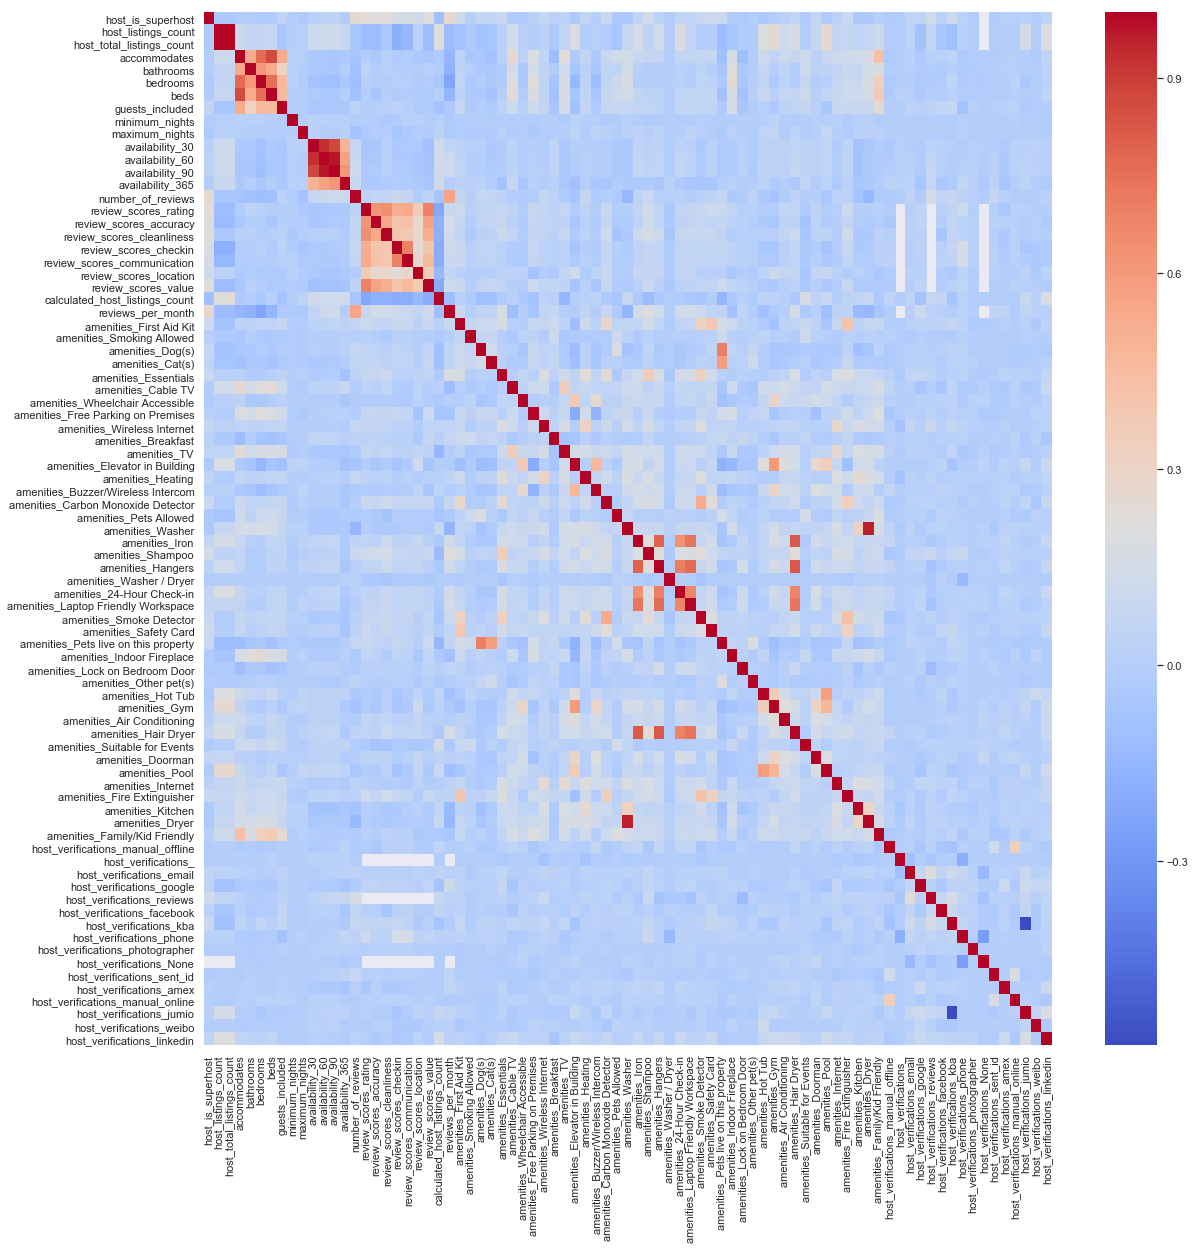

In [34]:
is_superhost_one = df_analysis2.select_dtypes([np.number]) # select only numeric variables. 
is_superhost_one = is_superhost_one.drop(columns=['id', 'host_id'])
#m = ~(is_superhost_one.mask(np.eye(len(is_superhost_one), dtype=bool)).abs() > 0.4).any()
is_superhost_one =is_superhost_one.corr()
sns.set(rc={'figure.figsize':(19,19)})
sns.heatmap(is_superhost_one, 
            xticklabels=is_superhost_one.columns.values,
            yticklabels=is_superhost_one.columns.values, cmap='coolwarm');

In [35]:
# This code was taken from stackoverflow at 
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Absolute Correlations")
a = get_top_abs_correlations(is_superhost_one, 20)
#a.sort_values(ascending=True).plot(kind='barh', figsize=(18, 11), sort_columns=False, title='c' );
print(a)

Top Absolute Correlations
host_listings_count                  host_total_listings_count              1.000000
amenities_Washer                     amenities_Dryer                        0.998711
availability_60                      availability_90                        0.998323
availability_30                      availability_60                        0.995914
                                     availability_90                        0.989981
accommodates                         beds                                   0.988334
amenities_Iron                       amenities_Hair Dryer                   0.986662
amenities_Hangers                    amenities_Hair Dryer                   0.986366
amenities_Iron                       amenities_Hangers                      0.981881
amenities_Hangers                    amenities_Laptop Friendly Workspace    0.973098
bedrooms                             beds                                   0.964930
amenities_Laptop Friendly Workspace  am

#### Analysis of Correlated Variables 

The correlations show and hint at the following characterstics:


A high correlation of the following amenities:
- Washer and Dryer
- Hair Dryer, Iron, Hangers

means that they ought to be kept together if one of them is present. This is quite self explainatory in the senese that if a Iron is present, then hangers ought to be present and if there are facitilies avaliable for washing garments such as a washer, then a dryer ought to be present aswell. These all amenities also correlate with the '24 hour check in amenities', meaning that an AirBnB which offer 24 hour check in ought to ideally have these amenities to get a better rating and review. 

A high correlation of a laptop friendly workspace with Iron, Handger and Hairdryer along with 24 hour check in means that that a laptop friendly workspace includes other amentities like Iron, Hair dryer and Hangers. 

It also shows that a rating score for communication is highly correlated with checkin score meaning that the checkin process, handling and the interaction that occurs during that time is a crucial determinant in determing communication rating score. 

<hr>
 


## 2. What are the general characterstics of AirBnBs and their hosts with a higher rating. 


We shall iteratively go through the features present in the dataset and do a comparision of which of those were most popular characterstic within that feature.  

We'll determine this by either checking which characterstic had a higher count with a wide margin from other characterstics present or we'll group/split the datapoints according to their review score(high score, average score, low score) and do a comparision to find which characterstics stood out in datapoints with a higher rating against the other data points. 

### Investigate the characterstics of AirBnBs with the highest review score rating. i.e. 100 

In [36]:
df_analysis3 = df_analysis.copy(deep=True)

In [37]:
#df_analysis3['review_scores_rating'].value_counts()
top_review_scores = df_analysis3[df_analysis3['review_scores_rating'] == 100] 
print('The number of airBnBs with the highest score rating were:', top_review_scores.shape[0])

The number of airBnBs with the highest score rating were: 781


### Top Locations

Top locations with the highest score were: 

Other neighborhoods    20.102433
Capitol Hill           15.492958
Central Area           13.700384
Downtown               11.395647
Queen Anne              9.218950
West Seattle            5.761844
Ballard                 4.609475
Rainier Valley          3.457106
Cascade                 2.432778
University District     2.304738
Beacon Hill             2.176697
Northgate               2.176697
Delridge                2.048656
Magnolia                1.920615
Lake City               1.920615
Seward Park             1.024328
Interbay                0.256082
Name: neighbourhood_group_cleansed, dtype: float64


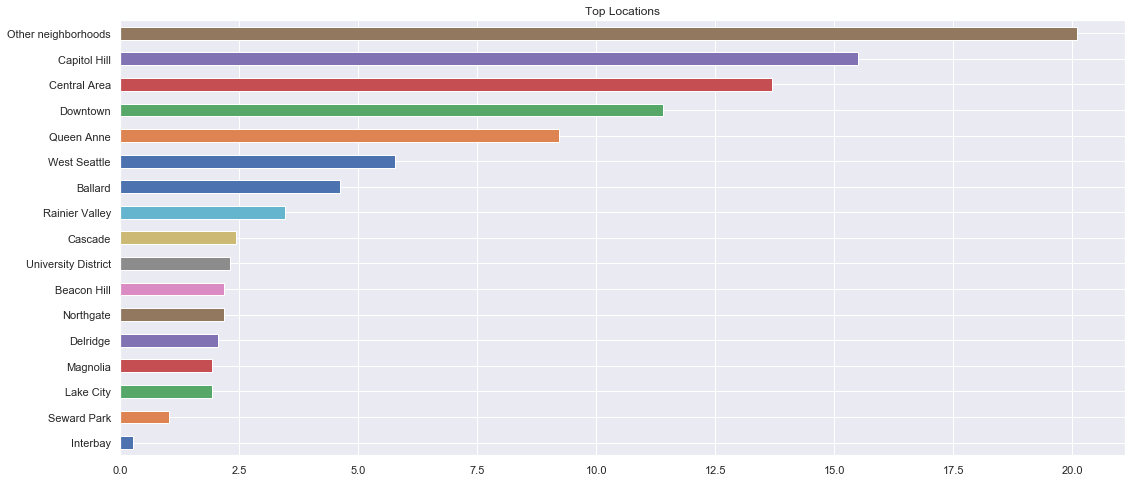

In [38]:
print('Top locations with the highest score were: ')
print()
print(((top_review_scores['neighbourhood_group_cleansed'].value_counts() * 100 / top_review_scores['review_scores_rating'].shape[0]).sort_values(ascending=False)));
(top_review_scores['neighbourhood_group_cleansed'].value_counts() * 100 / top_review_scores['review_scores_rating'].shape[0]).sort_values(ascending=True).plot(kind='barh', figsize=(18, 8), sort_columns=False, title='Top Locations' );

### Most preferred room type

room_type
Entire home/apt    542
Private room       214
Shared room         25
Name: review_scores_rating, dtype: int64


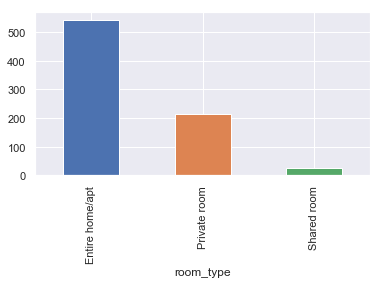

In [39]:
print((top_review_scores.groupby('room_type')['review_scores_rating'].count().sort_values(ascending=False)));
(top_review_scores.groupby('room_type')['review_scores_rating'].count().sort_values(ascending=False)).plot.bar(figsize=(6,3));

In [40]:
print('The most popular room type was: ',(top_review_scores.groupby('room_type')['review_scores_rating'].count().sort_values(ascending=False)).keys().tolist()[0])

The most popular room type was:  Entire home/apt


### Lets inverstigate the primary feature coloumns 

In [41]:
allcols = df_analysis.columns
allcols = allcols.drop(['id',
                         'host_location',
    'host_neighbourhood',  'host_response_rate',
    'price',
    'weekly_price',
    'cleaning_fee',
    'extra_people',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
 'name',
 'host_id',
 'host_name',
 'host_since', 'amenities_Heating',
 'amenities_Essentials',
 'amenities_Wheelchair Accessible',
 'amenities_Elevator in Building',
 'amenities_Internet',
 'amenities_24-Hour Check-in',
 'amenities_Shampoo',
 'amenities_Carbon Monoxide Detector',
 'amenities_Family/Kid Friendly',
 'amenities_Breakfast',
 'amenities_Lock on Bedroom Door',
 'amenities_Safety Card',
 'amenities_Pets Allowed',
 'amenities_Other pet(s)',
 'amenities_Kitchen',
 'amenities_Air Conditioning',
 'amenities_Smoking Allowed',
 'amenities_Dryer',
 'amenities_Buzzer/Wireless Intercom',
 'amenities_Cable TV',
 'amenities_Hangers',
 'amenities_Indoor Fireplace',
 'amenities_Hair Dryer',
 'amenities_Pets live on this property',
 'amenities_Wireless Internet',
 'amenities_Washer',
 'amenities_Free Parking on Premises',
 'amenities_Gym',
 'amenities_Pool',
 'amenities_TV',
 'amenities_Doorman',
 'amenities_Smoke Detector',
 'amenities_Laptop Friendly Workspace',
 'amenities_Suitable for Events',
 'amenities_Iron',
 'amenities_First Aid Kit',
 'amenities_Dog(s)',
 'amenities_Fire Extinguisher',
 'amenities_Cat(s)',
 'amenities_Hot Tub',
 'amenities_Washer / Dryer'])
allcols = allcols.tolist()

In [42]:
df_analysis.shape

(3818, 112)

### The dataset has been split into three categories:

**high_review_scores:** Consisted of data points which had a rating of 90 and above.  
**mid_review_scores:** Consisted of data points which had a rating between 70 and 90.  
**low_review_scores:** Consisted of data points which had a rating below 70.  

#### The below cells gives a comparitive analysis of each feature and how its charactersitcs vary between the three categories. Analysis of these features would follow right after the graphs. 

### General Characterstics

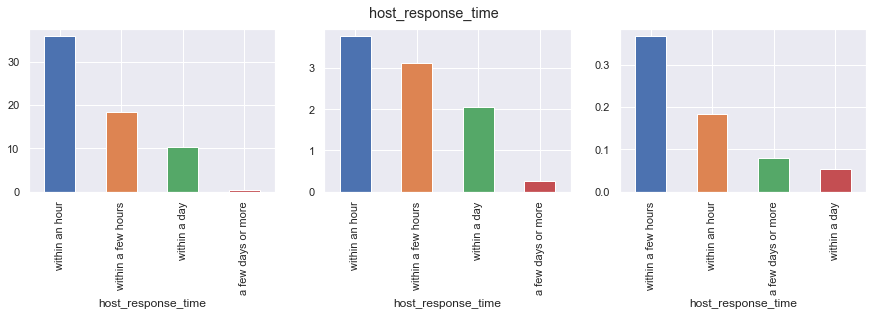

---------------------------------------------------------------------------------------------------------------------


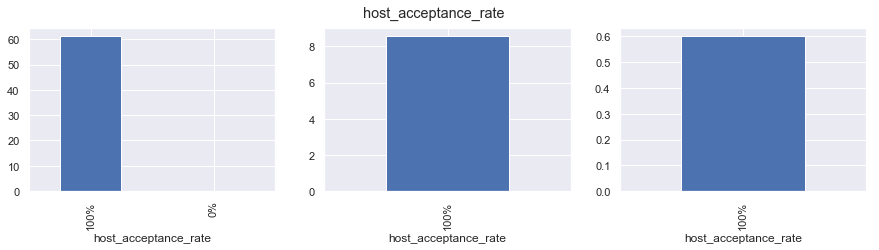

---------------------------------------------------------------------------------------------------------------------


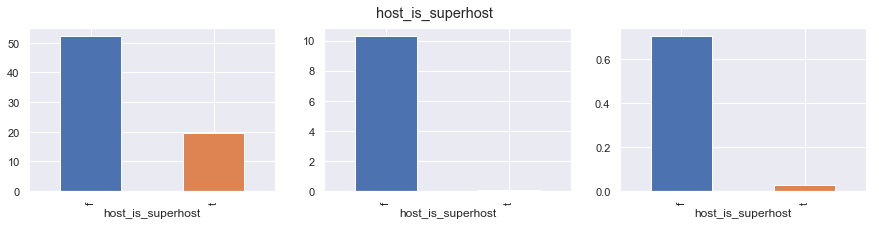

---------------------------------------------------------------------------------------------------------------------


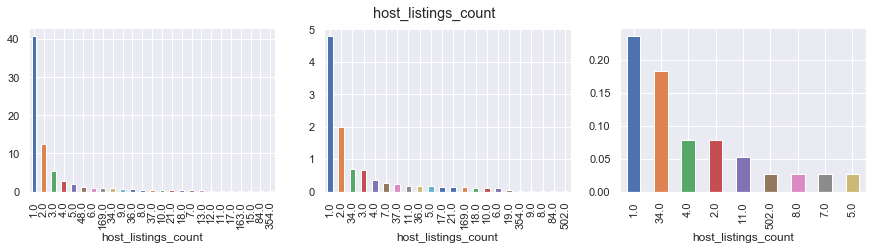

---------------------------------------------------------------------------------------------------------------------


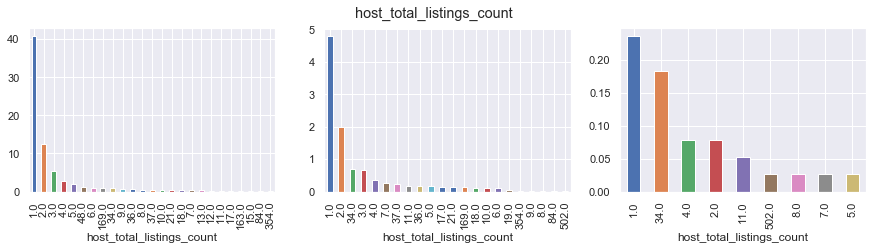

---------------------------------------------------------------------------------------------------------------------


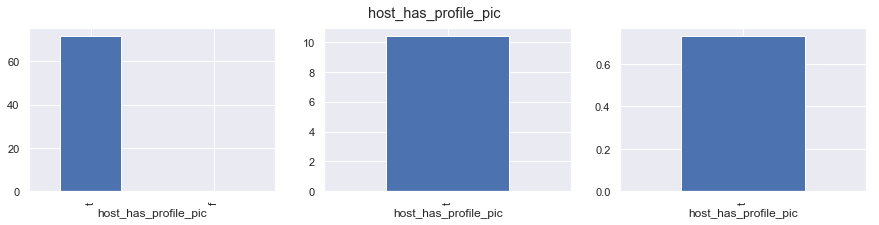

---------------------------------------------------------------------------------------------------------------------


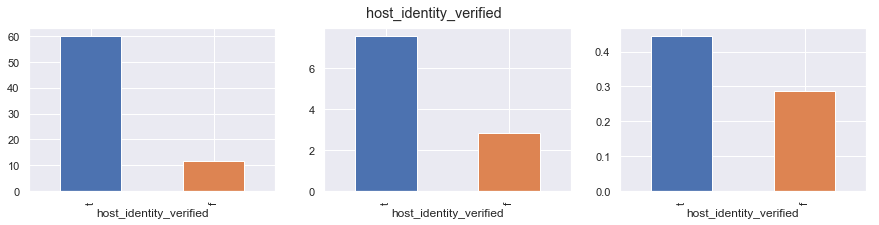

---------------------------------------------------------------------------------------------------------------------


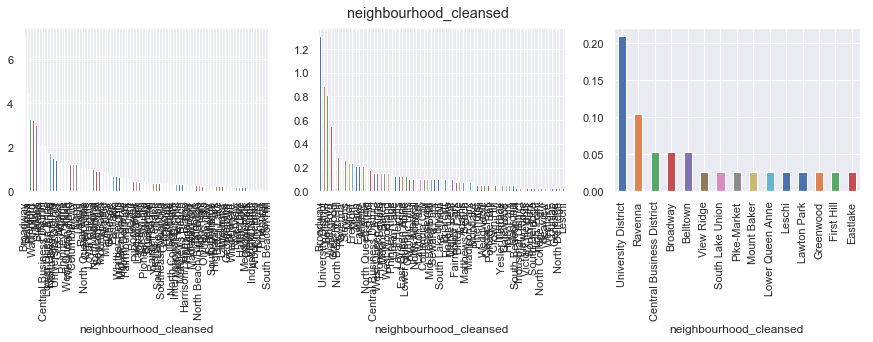

---------------------------------------------------------------------------------------------------------------------


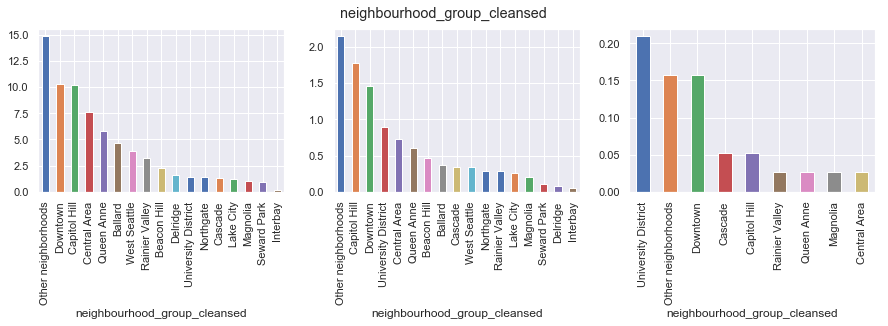

---------------------------------------------------------------------------------------------------------------------


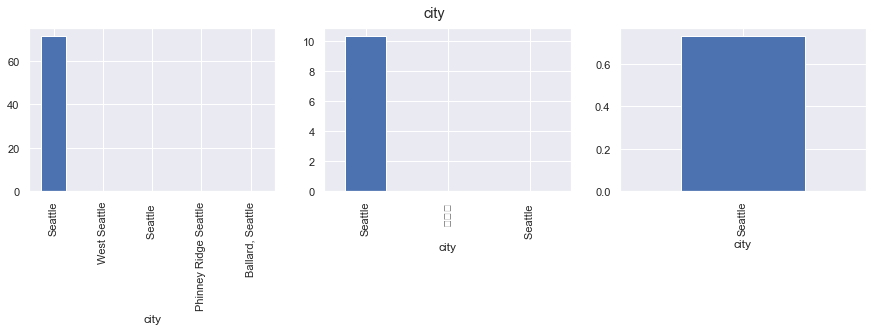

---------------------------------------------------------------------------------------------------------------------


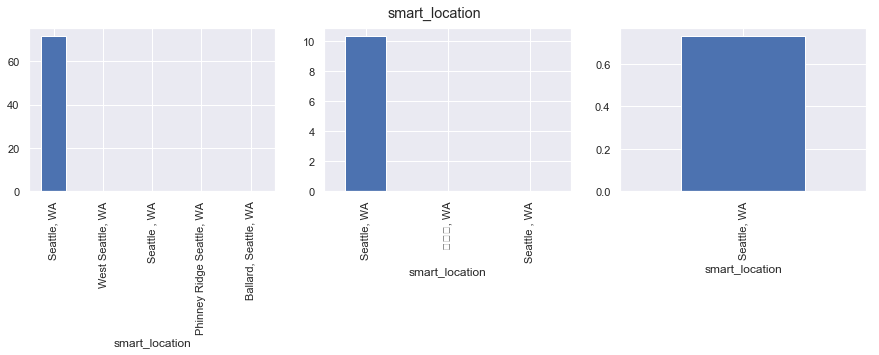

---------------------------------------------------------------------------------------------------------------------


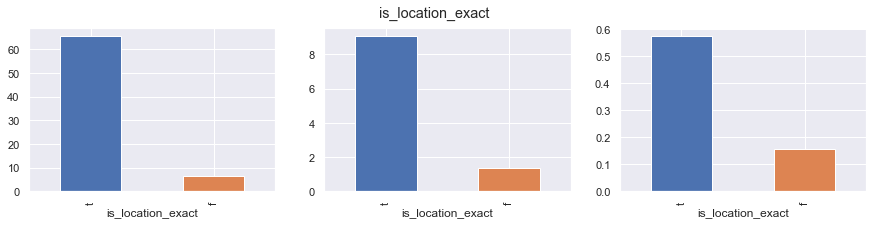

---------------------------------------------------------------------------------------------------------------------


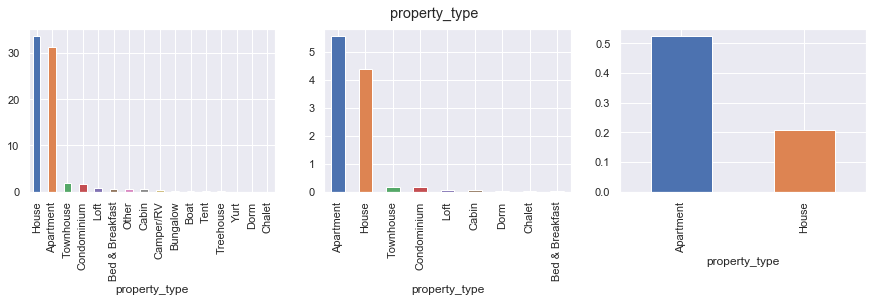

---------------------------------------------------------------------------------------------------------------------


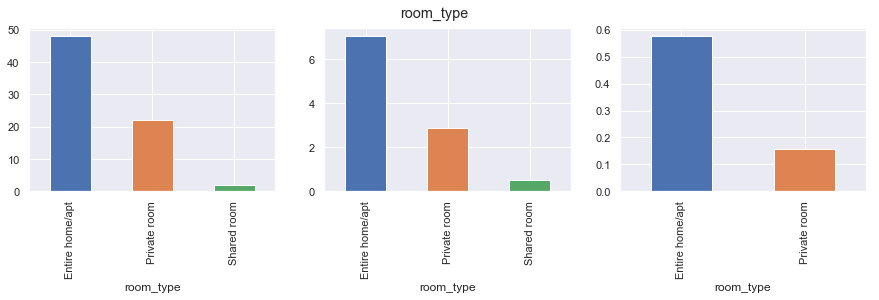

---------------------------------------------------------------------------------------------------------------------


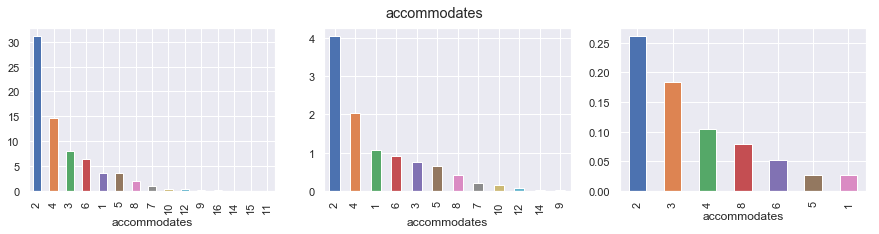

---------------------------------------------------------------------------------------------------------------------


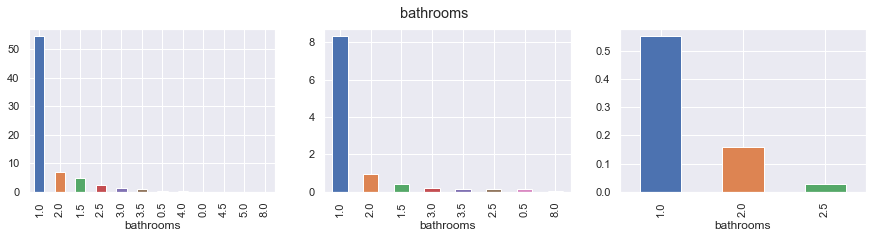

---------------------------------------------------------------------------------------------------------------------


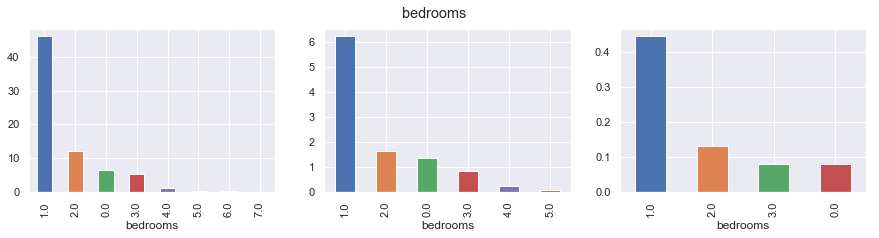

---------------------------------------------------------------------------------------------------------------------


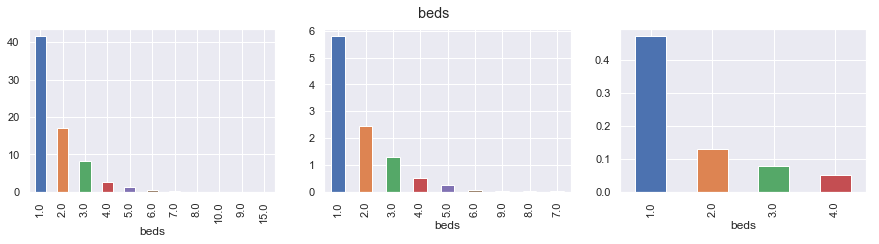

---------------------------------------------------------------------------------------------------------------------


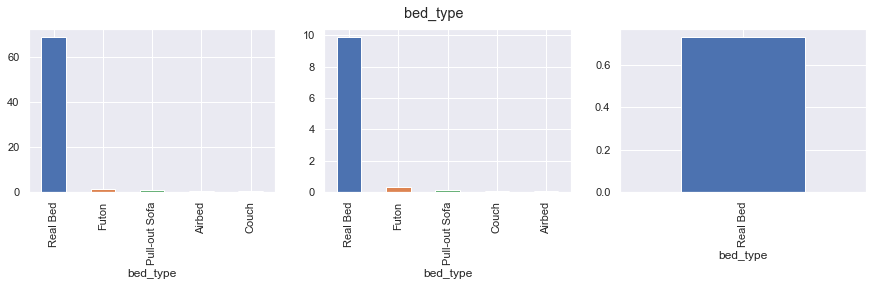

---------------------------------------------------------------------------------------------------------------------


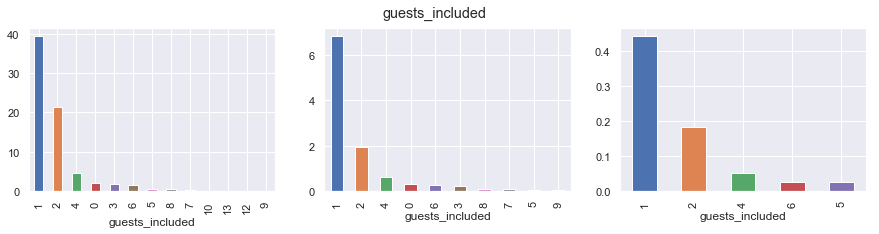

---------------------------------------------------------------------------------------------------------------------


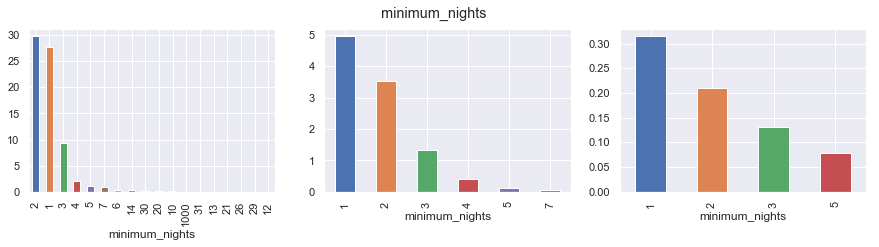

---------------------------------------------------------------------------------------------------------------------


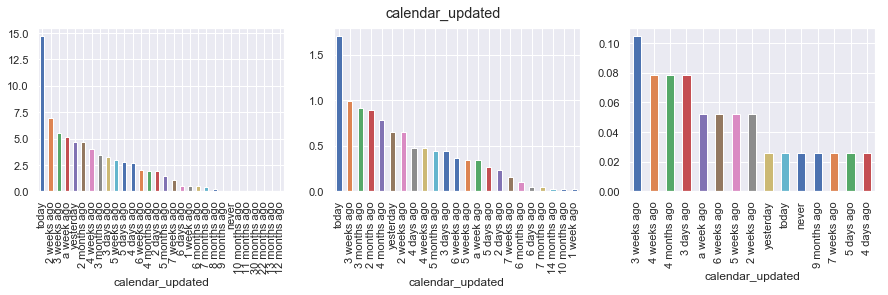

---------------------------------------------------------------------------------------------------------------------


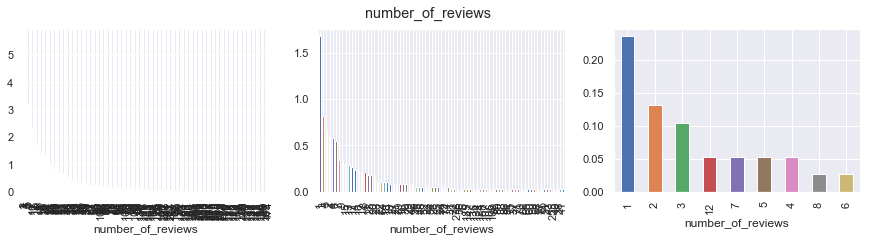

---------------------------------------------------------------------------------------------------------------------


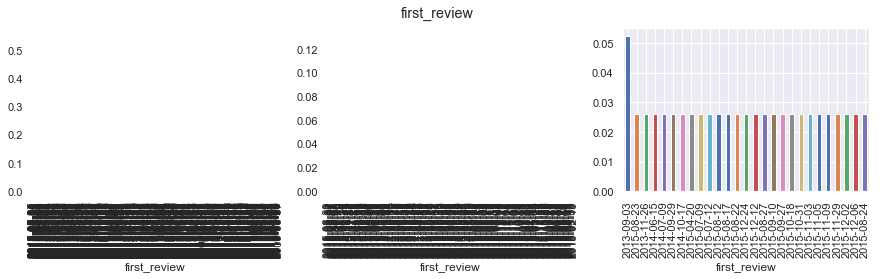

---------------------------------------------------------------------------------------------------------------------


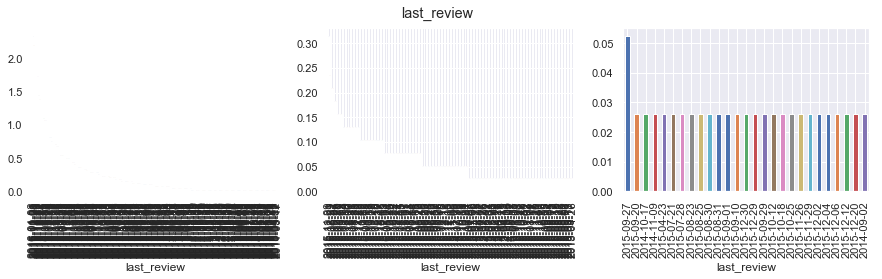

---------------------------------------------------------------------------------------------------------------------


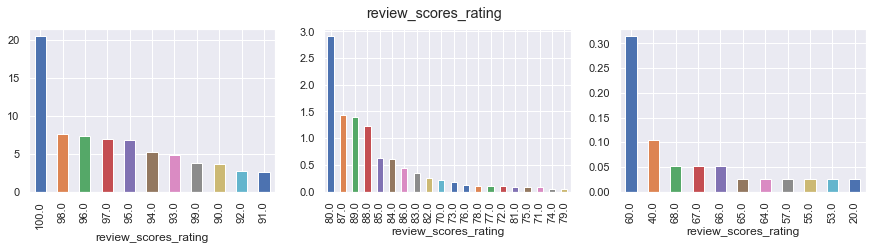

---------------------------------------------------------------------------------------------------------------------


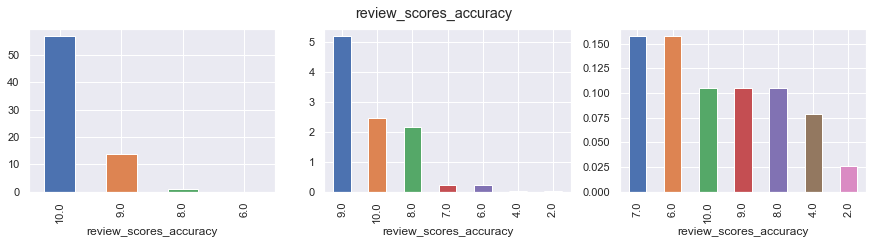

---------------------------------------------------------------------------------------------------------------------


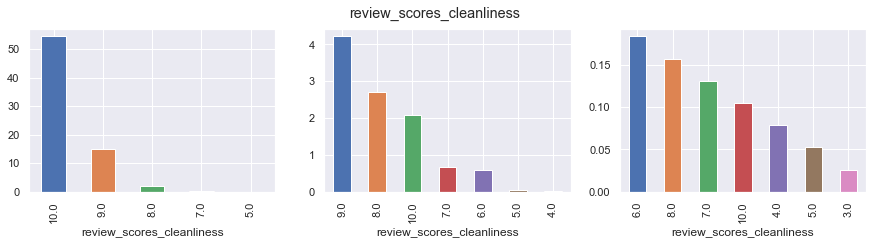

---------------------------------------------------------------------------------------------------------------------


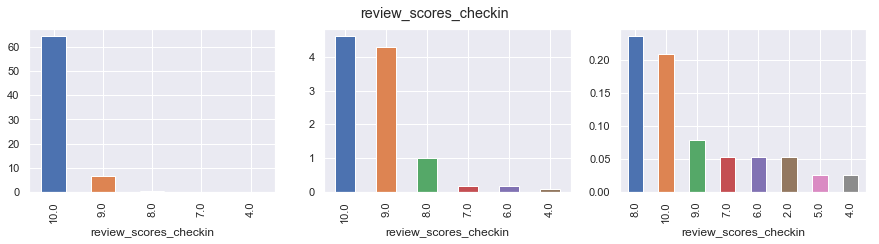

---------------------------------------------------------------------------------------------------------------------


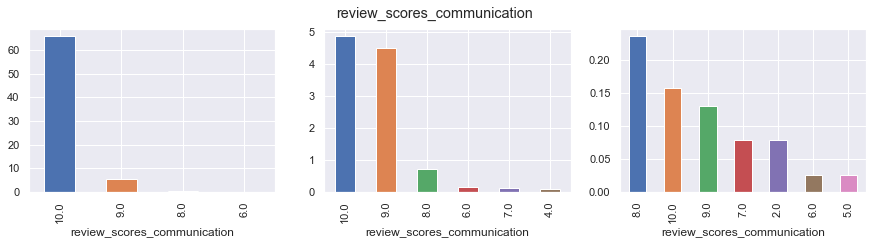

---------------------------------------------------------------------------------------------------------------------


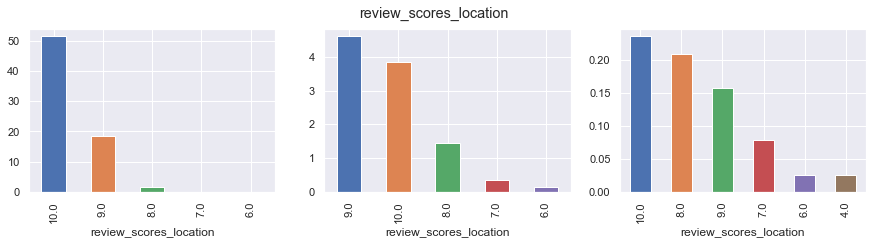

---------------------------------------------------------------------------------------------------------------------


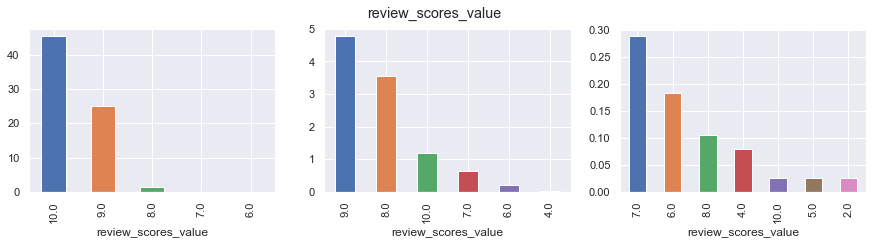

---------------------------------------------------------------------------------------------------------------------


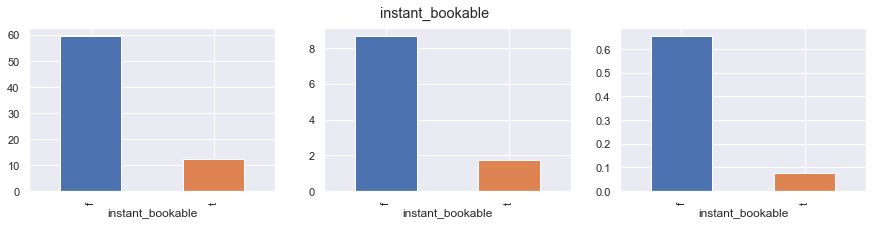

---------------------------------------------------------------------------------------------------------------------


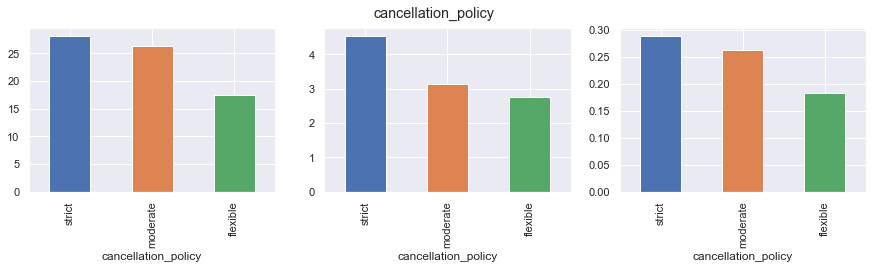

---------------------------------------------------------------------------------------------------------------------


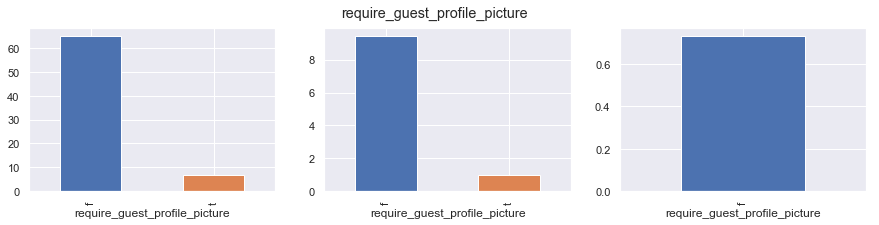

---------------------------------------------------------------------------------------------------------------------


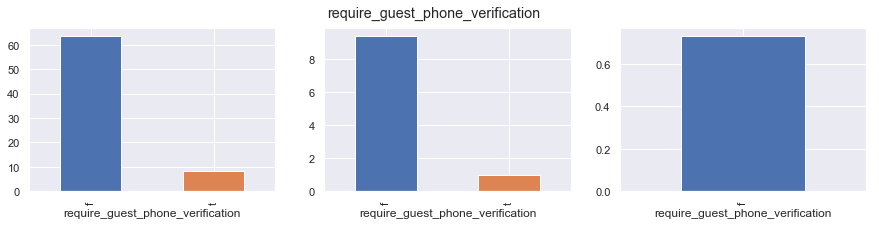

---------------------------------------------------------------------------------------------------------------------


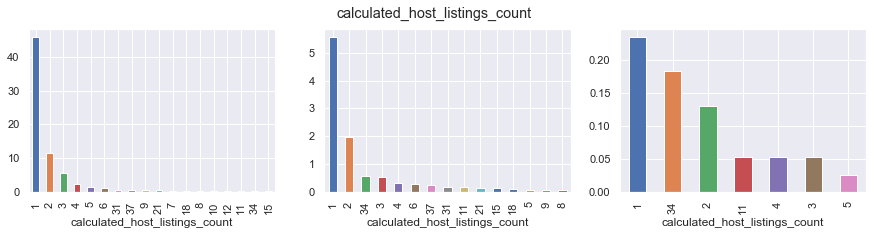

---------------------------------------------------------------------------------------------------------------------


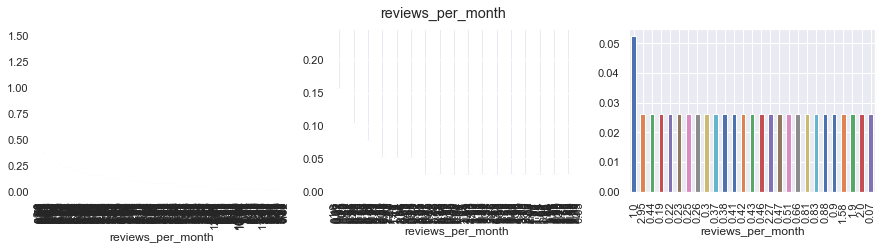

---------------------------------------------------------------------------------------------------------------------


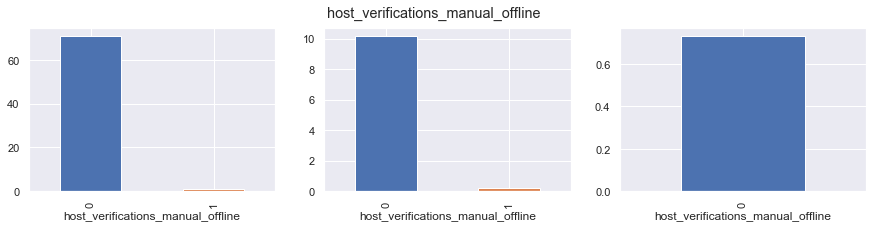

---------------------------------------------------------------------------------------------------------------------


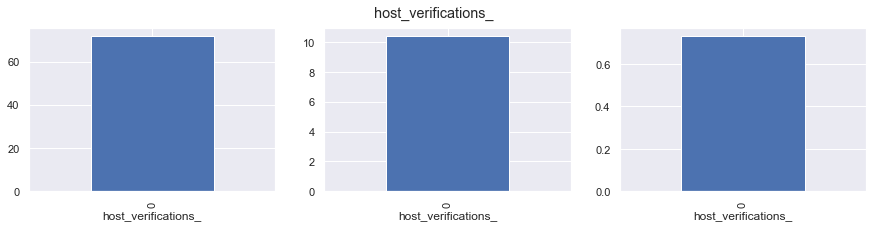

---------------------------------------------------------------------------------------------------------------------


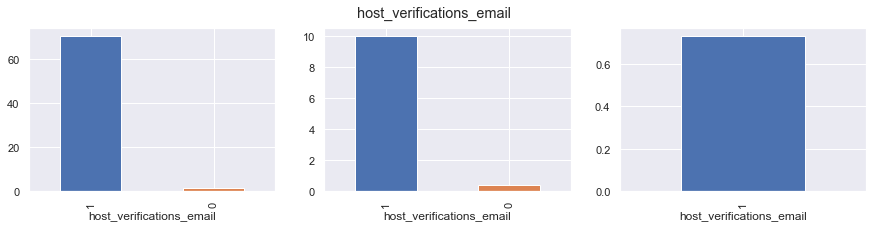

---------------------------------------------------------------------------------------------------------------------


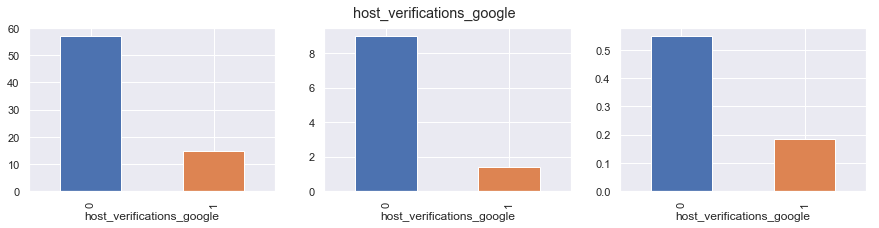

---------------------------------------------------------------------------------------------------------------------


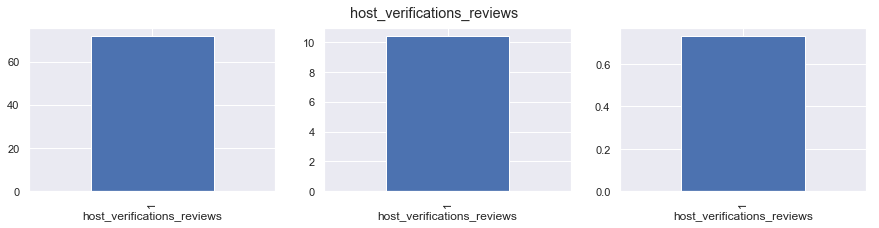

---------------------------------------------------------------------------------------------------------------------


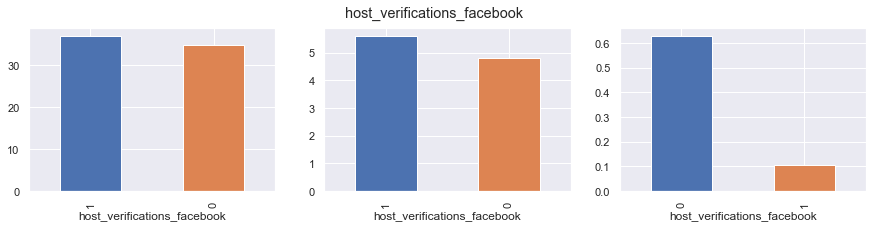

---------------------------------------------------------------------------------------------------------------------


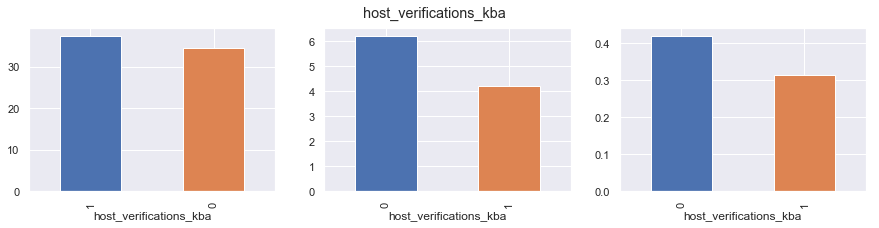

---------------------------------------------------------------------------------------------------------------------


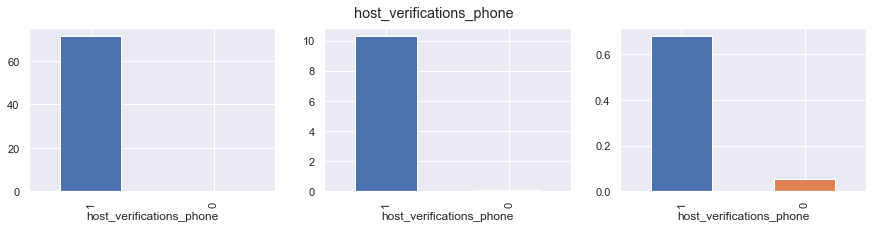

---------------------------------------------------------------------------------------------------------------------


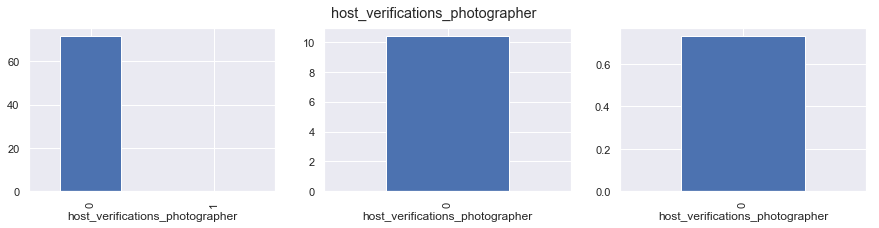

---------------------------------------------------------------------------------------------------------------------


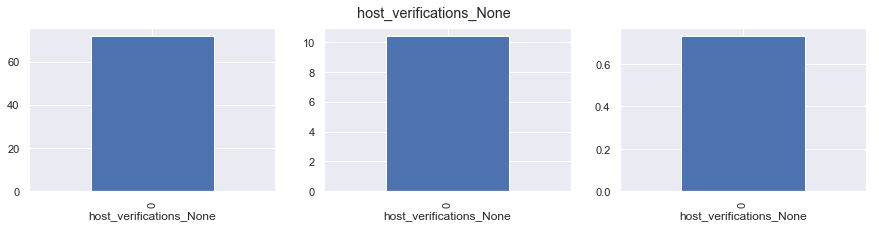

---------------------------------------------------------------------------------------------------------------------


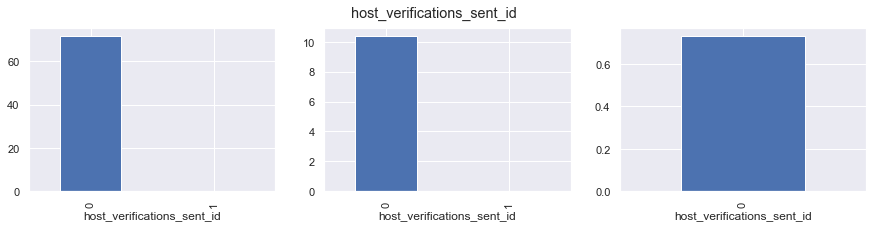

---------------------------------------------------------------------------------------------------------------------


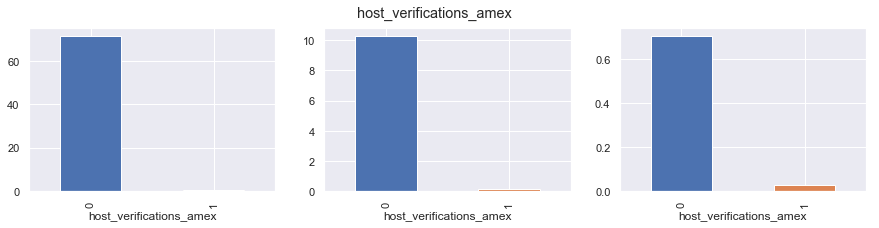

---------------------------------------------------------------------------------------------------------------------


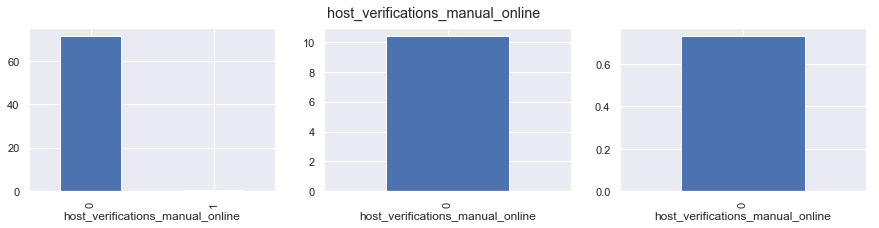

---------------------------------------------------------------------------------------------------------------------


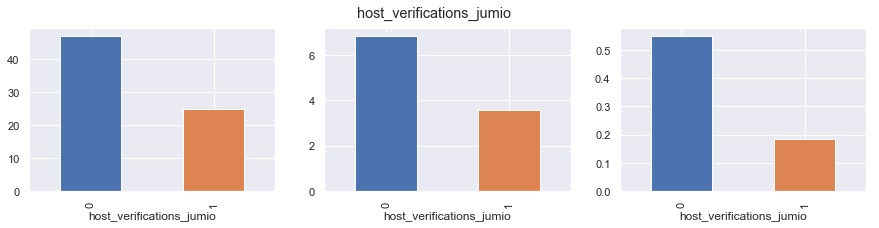

---------------------------------------------------------------------------------------------------------------------


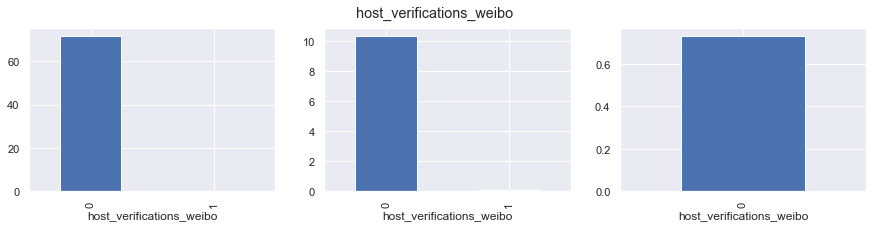

---------------------------------------------------------------------------------------------------------------------


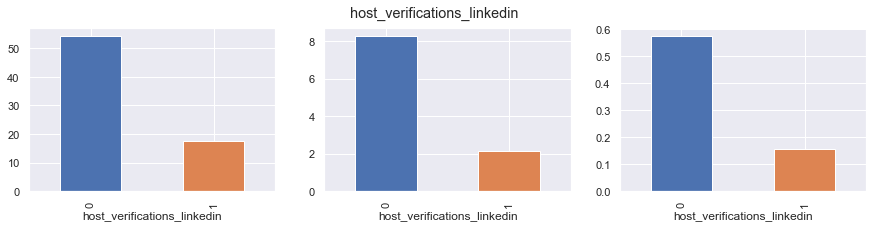

---------------------------------------------------------------------------------------------------------------------


In [43]:
high_review_scores = df_analysis3[df_analysis3['review_scores_rating'] >= 90]
mid_review_scores = df_analysis3[(df_analysis3['review_scores_rating'] >= 70) & (df_analysis3['review_scores_rating'] < 90) ]
low_review_scores = df_analysis3[df_analysis3['review_scores_rating'] < 70] 

for cols in allcols:
    #print(cols)
    fig, axs = plt.subplots(1,3, figsize=(15,3))
    fig.suptitle(cols)
    ((((high_review_scores.groupby(cols)['review_scores_rating'].count()) / df_analysis3.shape[0]) * 100).sort_values(ascending=False)).plot.bar( ax=axs[0])
    ((((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / df_analysis3.shape[0]) * 100).sort_values(ascending=False)).plot.bar( ax=axs[1])
    ((((low_review_scores.groupby(cols)['review_scores_rating'].count()) / df_analysis3.shape[0]) * 100).sort_values(ascending=False)).plot.bar( ax=axs[2])
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')

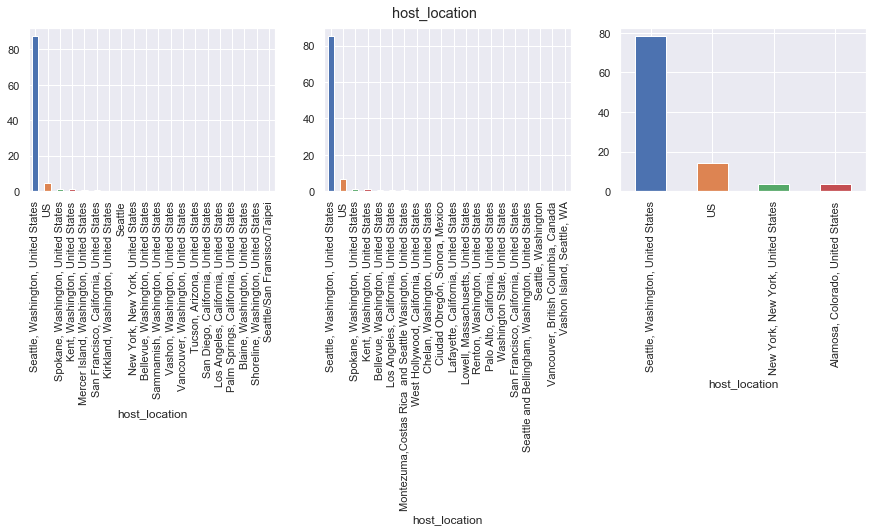

---------------------------------------------------------------------------------------------------------------------



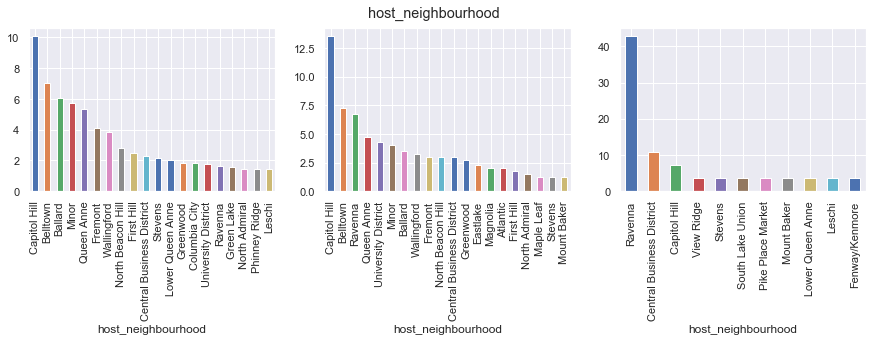

---------------------------------------------------------------------------------------------------------------------



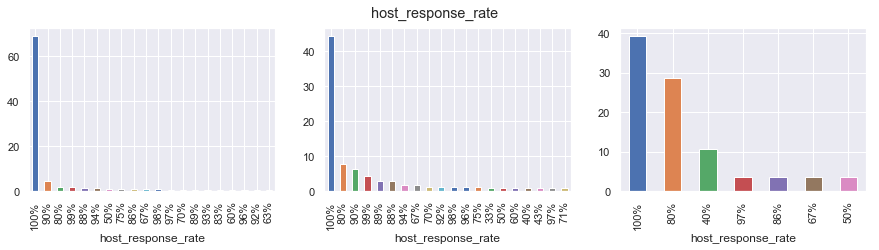

---------------------------------------------------------------------------------------------------------------------



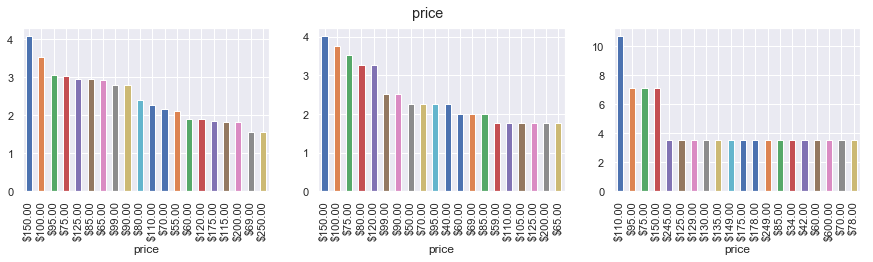

---------------------------------------------------------------------------------------------------------------------



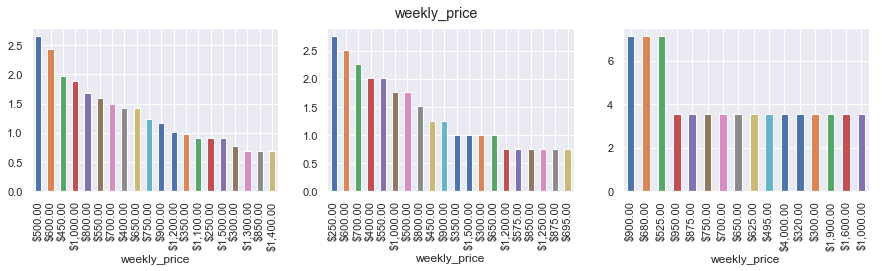

---------------------------------------------------------------------------------------------------------------------



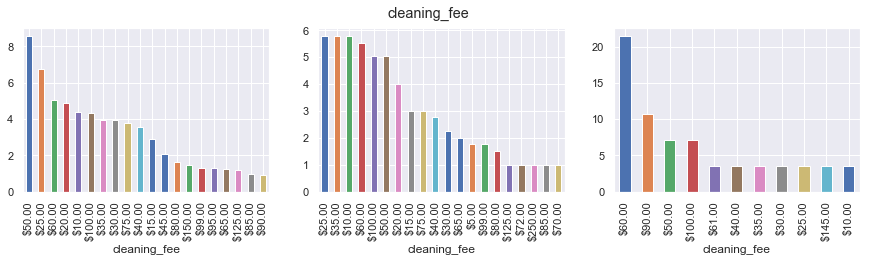

---------------------------------------------------------------------------------------------------------------------



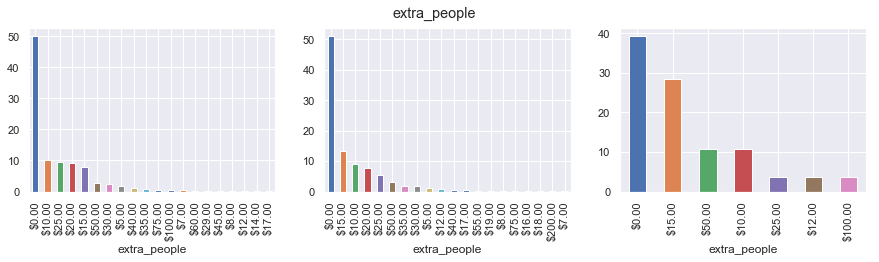

---------------------------------------------------------------------------------------------------------------------



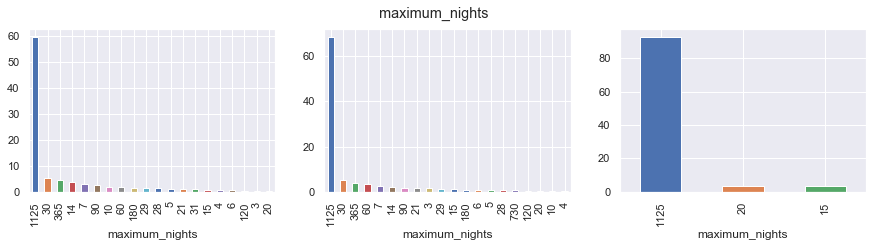

---------------------------------------------------------------------------------------------------------------------



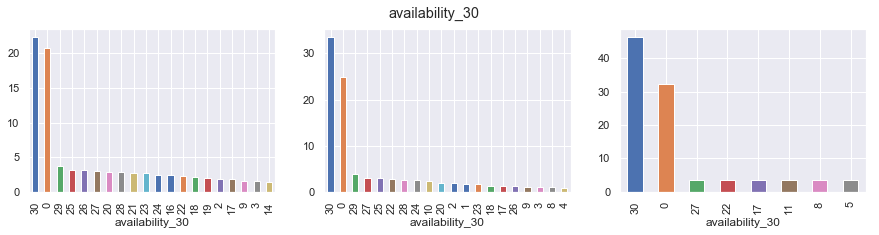

---------------------------------------------------------------------------------------------------------------------



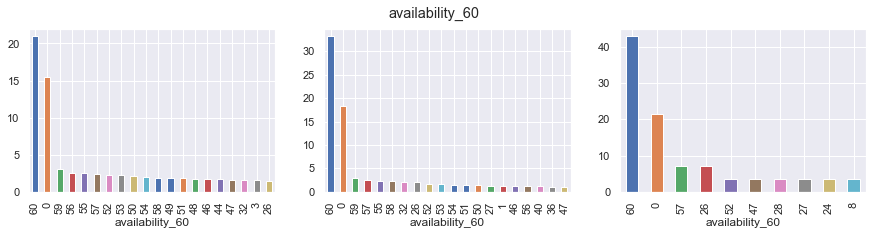

---------------------------------------------------------------------------------------------------------------------



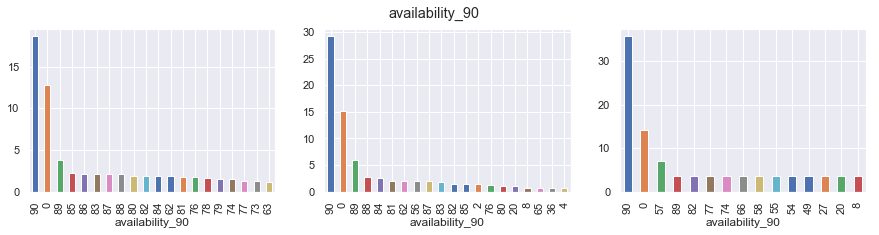

---------------------------------------------------------------------------------------------------------------------



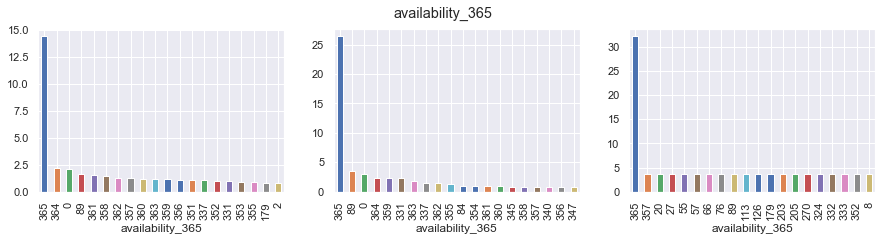

---------------------------------------------------------------------------------------------------------------------



In [44]:
## Creating a seperate dataframe for features with messy graphs. 
analylis2 = df_analysis.copy(deep=True)
analylis2a = analylis2[[   'host_location',
    'host_neighbourhood',
    'host_response_rate',
    'price',
    'weekly_price',
    'cleaning_fee',
    'extra_people',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'

]]

analylis2a_cols = analylis2a.columns

for cols in analylis2a_cols:
    fig, axs = plt.subplots(1,3, figsize=(15,3))
    fig.suptitle(cols)
    ((((high_review_scores.groupby(cols)['review_scores_rating'].count()) / high_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[0])
    ((((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / mid_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[1])
    ((((low_review_scores.groupby(cols)['review_scores_rating'].count()) / low_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[2])
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')
    print()

### Evaluation and analysis of the graphs of the important characterstics and trends found in the dataset


We divided the data into three categories based on their review score categories:

**high_review_scores:** Consisted of data points which had a rating of 90 and above.  
**mid_review_scores:** Consisted of data points which had a rating between 70 and 90.  
**low_review_scores:** Consisted of data points which had a rating below 70.  

**The intention is to determine how the trends within the features vary between each categories. It would allow us to understand which features play a determining role in emabling the airBnB to get a higher rating.**


**host_response_time:**  
While the trends largely remain same within all the three datasets, we find that the majority of data points with high_review_scores not only responded within an hour but also the incidence of data points which responded 'within a few hours' and 'within a day' is far lesser when compared to datapoints having a average and lower rating score. 

**host_is_superhost:**  
The only category that consisted of a sizable number pf superhosts(~25%) were that of high_review_scores. The remaining datasets and a neglible number of superhosts. This shows that if a host falls within the superhost category, it has a chance of getting a high review score in compariesion to other hosts. 

We can built on this observation and determine what are the characterstics that differenciate between superhosts and hosts. 

**host_identity_verified:**  
The dataset of high_review_scores had a far greater number of hosts with verified identies and a much lower incidence of hosts with unverified ids in comparision to other datasets which had a far greater percentage of unverified hosts. 

This allows us to conclude that a verified identification contributes to a higher score rating. 


**neighbourhood_group_cleansed:**  
AirBnBs with a higher score rating were found within the 'Downtown neighbourhood' followed by 'Capital Hill'. We find that average_review_scores consisted of both these neighbourhoods in their top two categories. 

This shows that the ideal neighbourhood for the AirBnB to be located in is Downtown followed by Capital Hill. 

**is_location_exact:**  
A lower percentage(< 10%) of high_review_scores had inexact locations in comparision to other categories. 

Hosts should therefore focus on ensuring that their location mentioned is exact to increase the likelihood of getting a better rating. 

**property_type:**  
AirBnBs with the highest score ratings were largely 'Houses' followed by 'Apartments', while the remaings AirBnBs with a lower scores were laregly Apartments followed by Houses. 

A property type admittidly does play a role in score rating however its role isn't of much signifance as long as the property type is either a 'House or Apartment. Having other types of properties such as a Townhouse, Loft, Dorm has a far greater chance of contributing to a lower rating score. 

**room_type:**  
The trends between all the three datasets are largely the same however they do show that an Entire home/apt is favoured greatly by renters in comparision to other types of rooms. 

Host should therefore consider renting out entire homes and apartments rather than opting to rent out a private room or worse - a shared room.

**accommodates:**  
Rooms should ideally accomdate 2 - 4 people. This would enable the airBnB to have a higher score rating.

**Other considerations:**  
- bedtype should be a real bed.
- guests_included: Average of 1 -2 guests can be included.
- review_scores_cleanliness: Clean BnBs play a contributing role in higher scores. 
- review_scores_communication: Good communication is impertive to obtain a higher rating.
- review_scores_location: Location as mentioed earlier plays a significant role in a higher rating.
- minimum_nights: The AirBnBs with a higher score rating largely offered a minimum number of 2 nights(~42%) followed by a single night. Hosts should consider keeping this feature in mind when they are booking AirBnBs.


### Amenities Characterstics

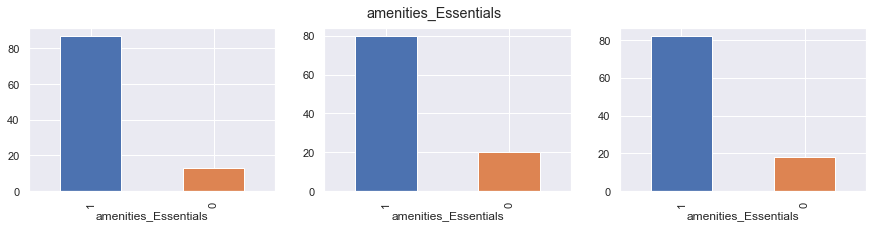

---------------------------------------------------------------------------------------------------------------------



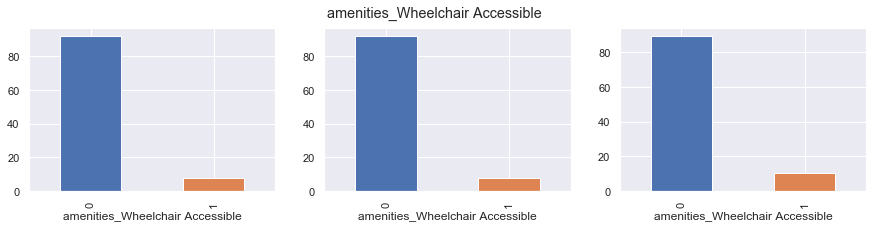

---------------------------------------------------------------------------------------------------------------------



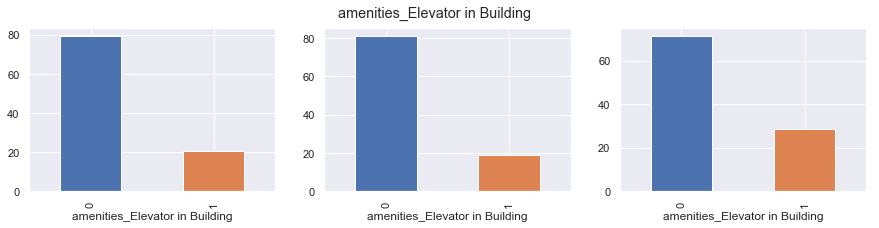

---------------------------------------------------------------------------------------------------------------------



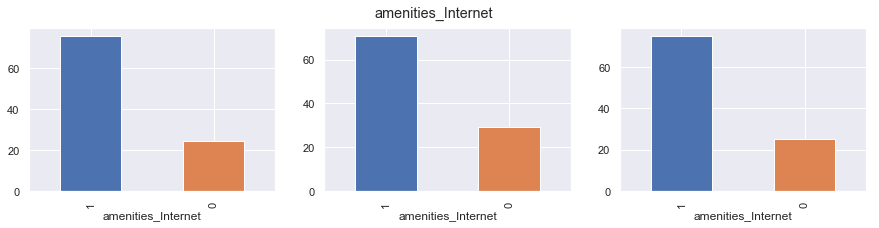

---------------------------------------------------------------------------------------------------------------------



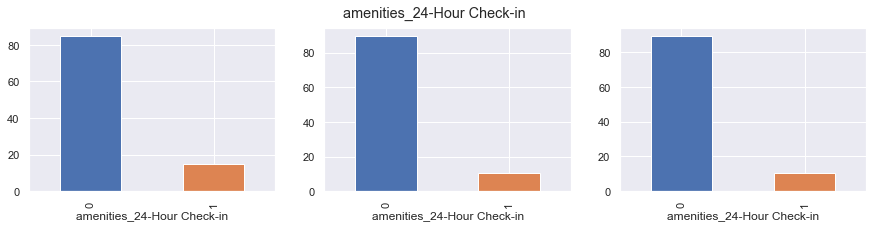

---------------------------------------------------------------------------------------------------------------------



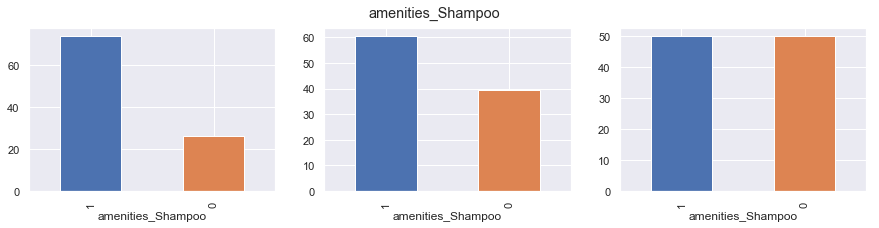

---------------------------------------------------------------------------------------------------------------------



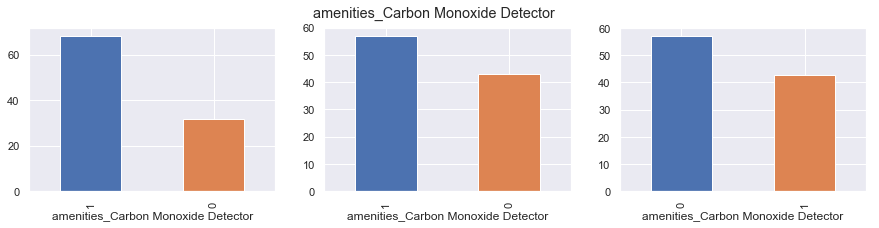

---------------------------------------------------------------------------------------------------------------------



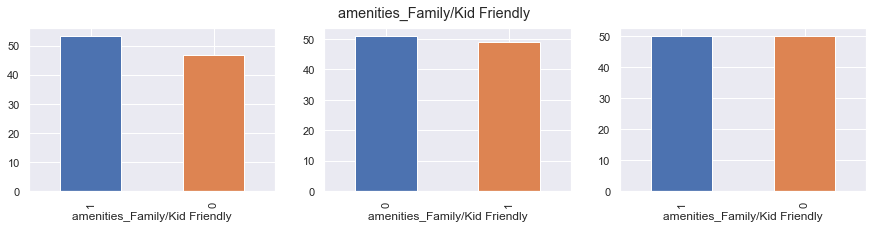

---------------------------------------------------------------------------------------------------------------------



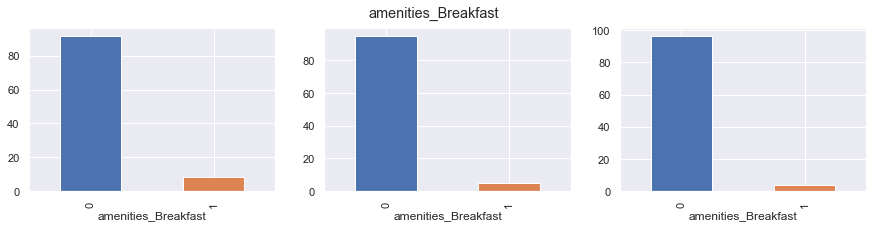

---------------------------------------------------------------------------------------------------------------------



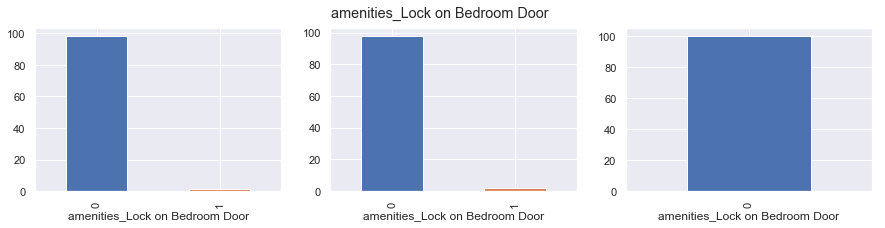

---------------------------------------------------------------------------------------------------------------------



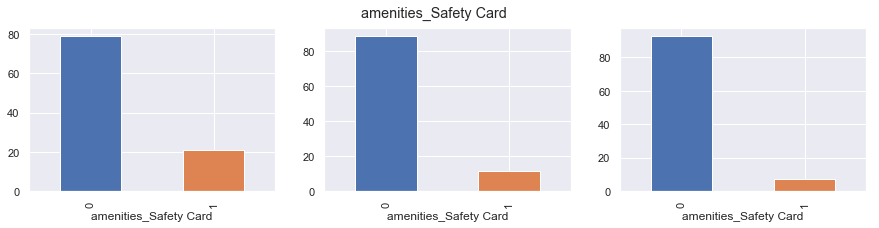

---------------------------------------------------------------------------------------------------------------------



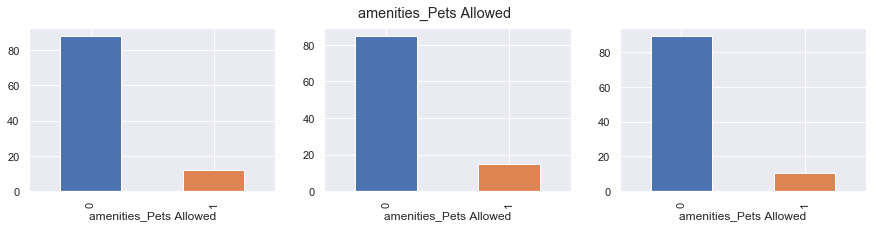

---------------------------------------------------------------------------------------------------------------------



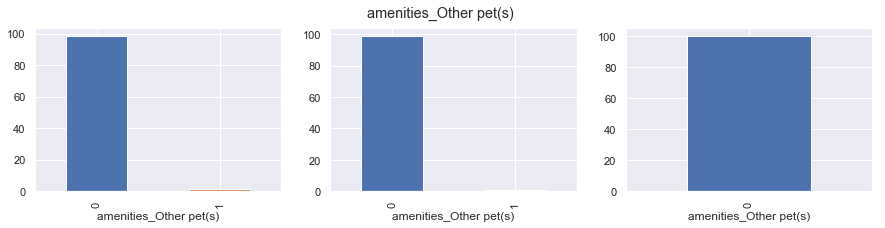

---------------------------------------------------------------------------------------------------------------------



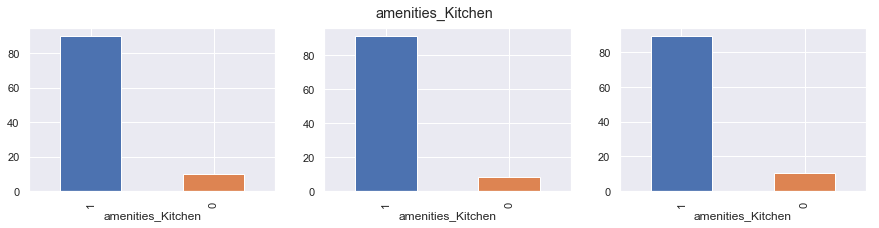

---------------------------------------------------------------------------------------------------------------------



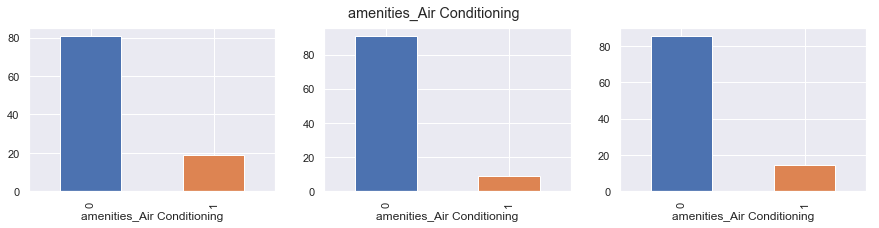

---------------------------------------------------------------------------------------------------------------------



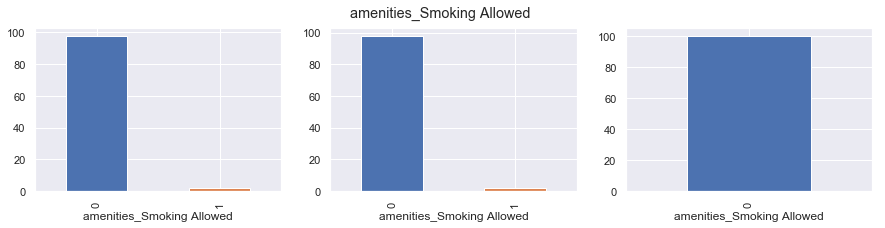

---------------------------------------------------------------------------------------------------------------------



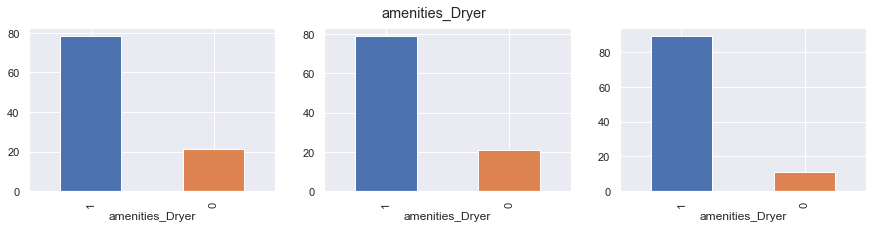

---------------------------------------------------------------------------------------------------------------------



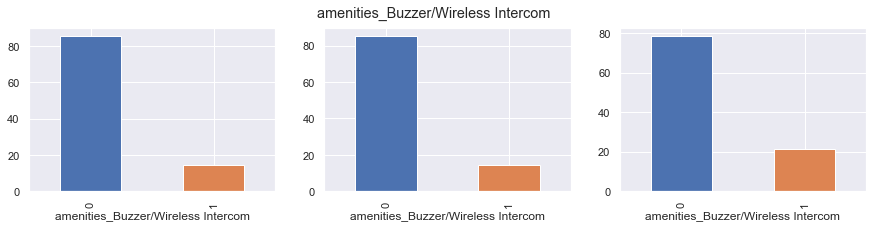

---------------------------------------------------------------------------------------------------------------------



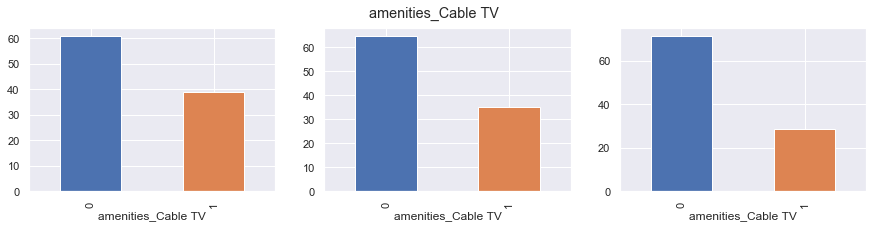

---------------------------------------------------------------------------------------------------------------------



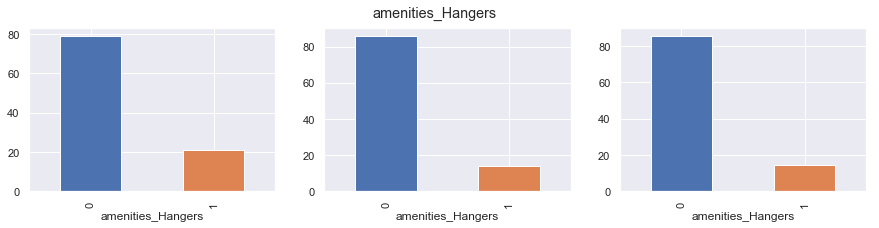

---------------------------------------------------------------------------------------------------------------------



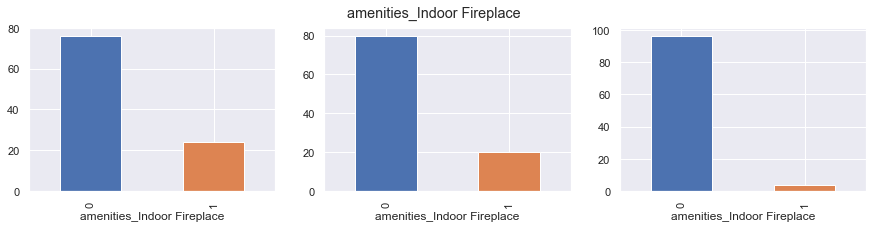

---------------------------------------------------------------------------------------------------------------------



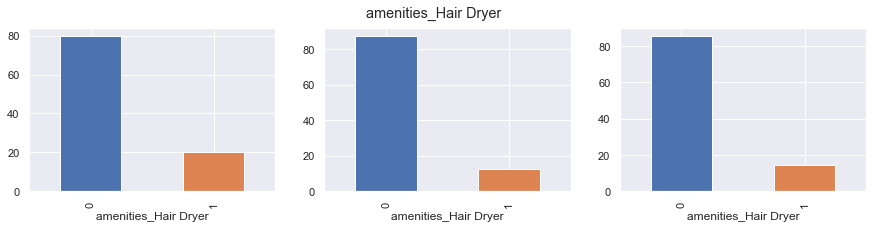

---------------------------------------------------------------------------------------------------------------------



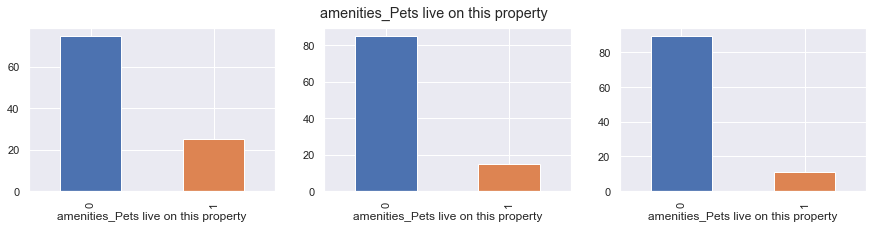

---------------------------------------------------------------------------------------------------------------------



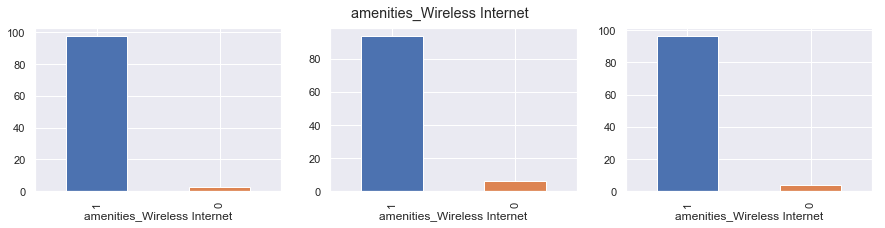

---------------------------------------------------------------------------------------------------------------------



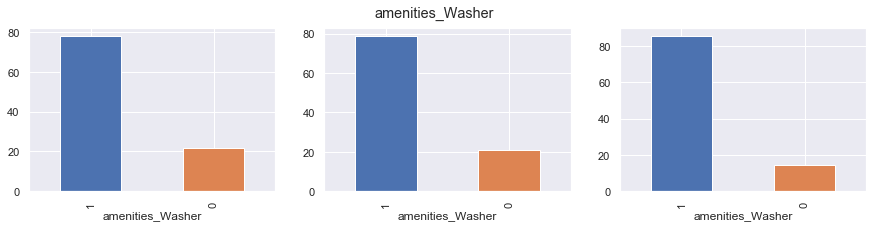

---------------------------------------------------------------------------------------------------------------------



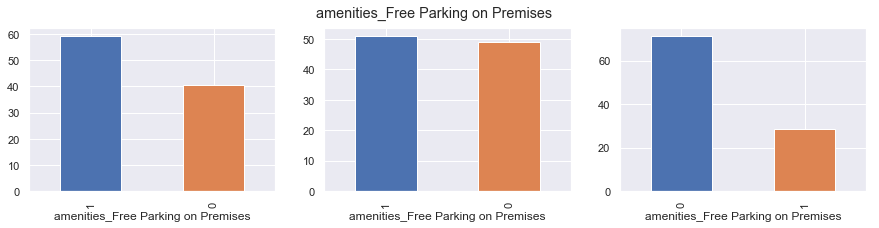

---------------------------------------------------------------------------------------------------------------------



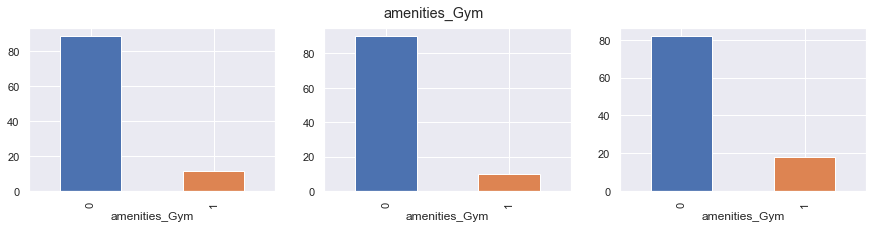

---------------------------------------------------------------------------------------------------------------------



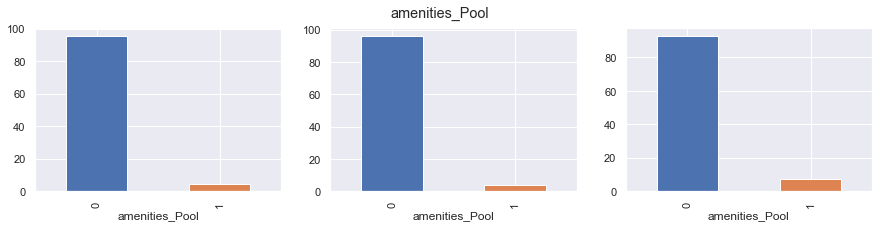

---------------------------------------------------------------------------------------------------------------------



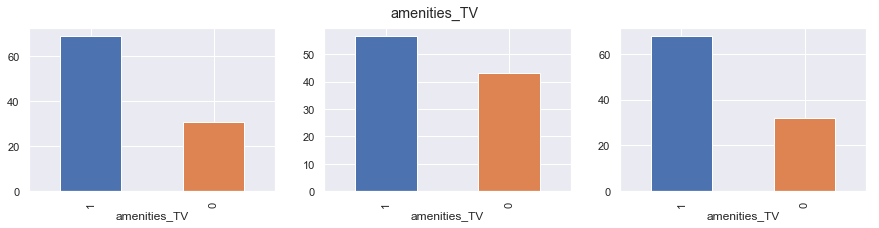

---------------------------------------------------------------------------------------------------------------------



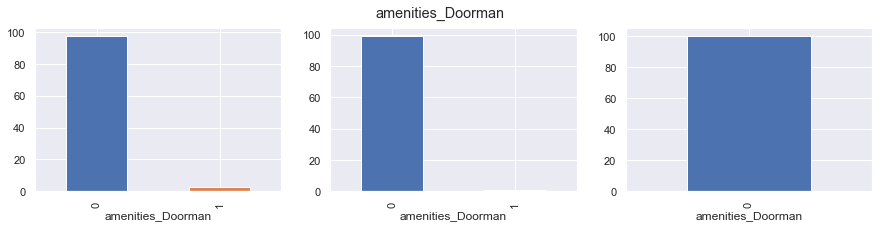

---------------------------------------------------------------------------------------------------------------------



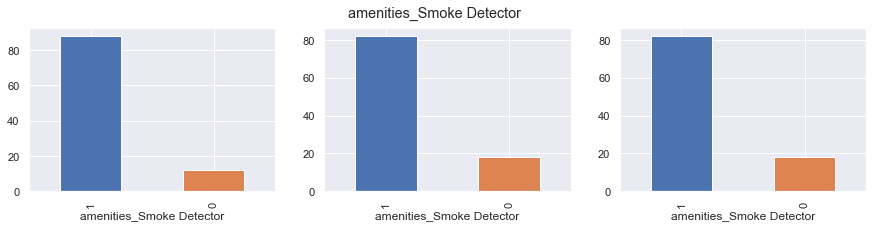

---------------------------------------------------------------------------------------------------------------------



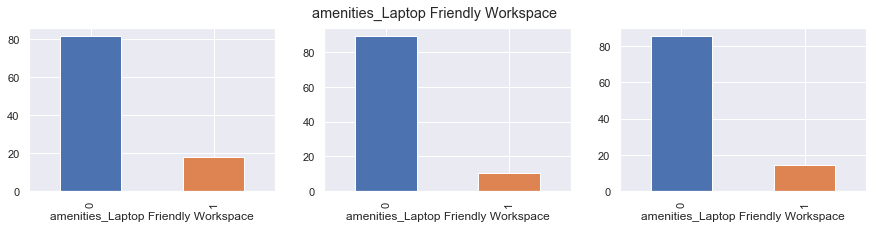

---------------------------------------------------------------------------------------------------------------------



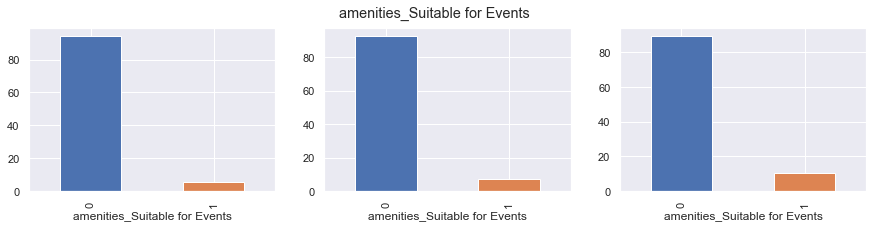

---------------------------------------------------------------------------------------------------------------------



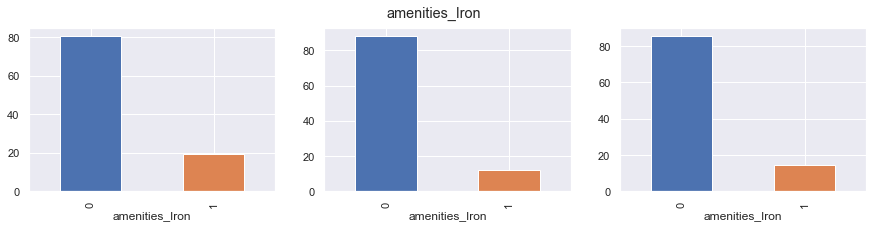

---------------------------------------------------------------------------------------------------------------------



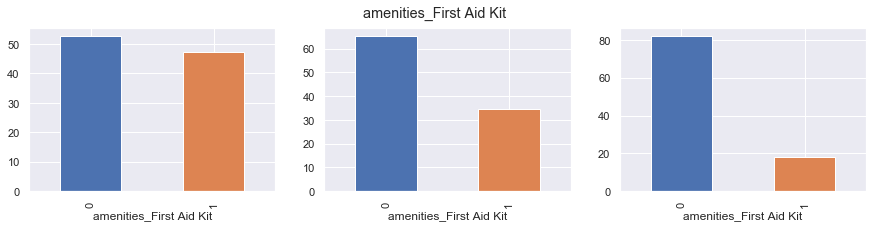

---------------------------------------------------------------------------------------------------------------------



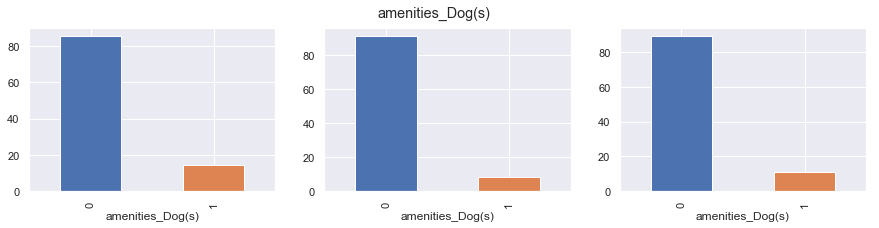

---------------------------------------------------------------------------------------------------------------------



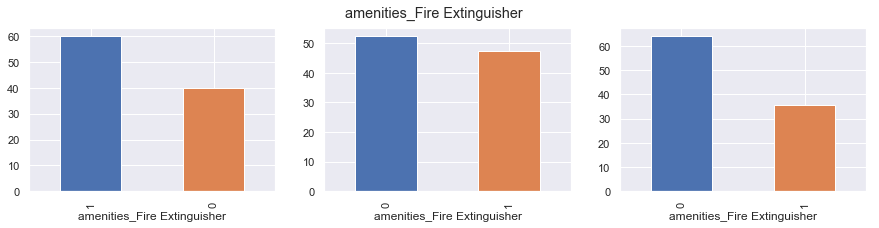

---------------------------------------------------------------------------------------------------------------------



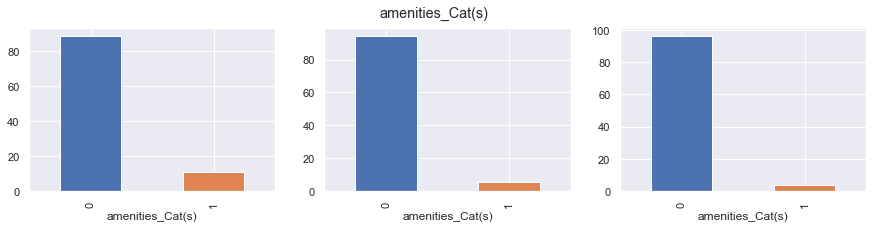

---------------------------------------------------------------------------------------------------------------------



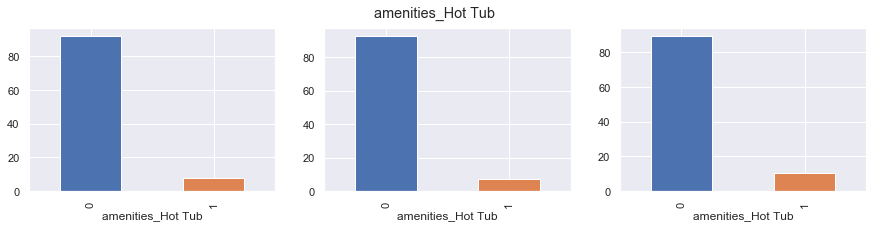

---------------------------------------------------------------------------------------------------------------------



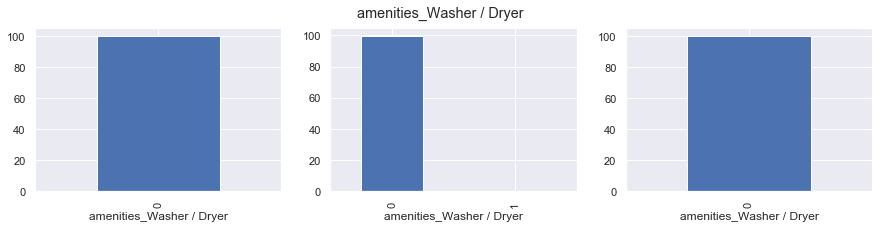

---------------------------------------------------------------------------------------------------------------------



In [45]:
amenities_colmn = ['amenities_Essentials', 'amenities_Wheelchair Accessible', 'amenities_Elevator in Building',
 'amenities_Internet',
 'amenities_24-Hour Check-in',
 'amenities_Shampoo',
 'amenities_Carbon Monoxide Detector',
 'amenities_Family/Kid Friendly',
 'amenities_Breakfast',
 'amenities_Lock on Bedroom Door',
 'amenities_Safety Card',
 'amenities_Pets Allowed',
 'amenities_Other pet(s)',
 'amenities_Kitchen',
 'amenities_Air Conditioning',
 'amenities_Smoking Allowed',
 'amenities_Dryer',
 'amenities_Buzzer/Wireless Intercom',
 'amenities_Cable TV',
 'amenities_Hangers',
 'amenities_Indoor Fireplace',
 'amenities_Hair Dryer',
 'amenities_Pets live on this property',
 'amenities_Wireless Internet',
 'amenities_Washer',
 'amenities_Free Parking on Premises',
 'amenities_Gym',
 'amenities_Pool',
 'amenities_TV',
 'amenities_Doorman',
 'amenities_Smoke Detector',
 'amenities_Laptop Friendly Workspace',
 'amenities_Suitable for Events',
 'amenities_Iron',
 'amenities_First Aid Kit',
 'amenities_Dog(s)',
 'amenities_Fire Extinguisher',
 'amenities_Cat(s)',
 'amenities_Hot Tub',
 'amenities_Washer / Dryer']

for cols in amenities_colmn:
    fig, axs = plt.subplots(1,3, figsize=(15,3))
    fig.suptitle(cols)
    ((((high_review_scores.groupby(cols)['review_scores_rating'].count()) / high_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[0])
    ((((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / mid_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[1])
    ((((low_review_scores.groupby(cols)['review_scores_rating'].count()) / low_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[2])
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')
    print()

### Evaluation of which amenities are the most important and play a role in obtaining a high rating therefore increasing revenue. Correlations also discussed: 

**Play a higher role in a higher rating:**  
- First Aid kit
- Shampoo
- Wireless Internet
- TV (incidences of AirBnBs without TV were far lower than those with a lower rating)
- Internet (incidences of AirBnBs without Internet were far lower than those with a lower rating)
- Free Parking on Premises

**Play a contributing role in a higher rating:**  
- Safety Card (20%)
- Hair dryer
- Carbon Monoxide detecter
- Smoke Detector( incidences of AirBnBs without Smole dector were far lower than those with a lower rating)
- Fire extinguisher 
- Oets living on property
- Google host verified

**Play a negliable role in a higher rating:**  
- Washer / Dryer
- 24 hour check in
- Buzzer / Intercom
- Dogs
- Laptop Friendly Workspace
- Family/ kid frendly
- Cable TV
- Hangers
- Iron
- Fireplace Indoor
- Host verified facebook
- Host verification_Kba

**Following amentities were found in all categories:**  
- Dryer 
- Kitchen
- Washer
- Heating
- Host verifications phone
- Host verifications email


### Host Characterstics

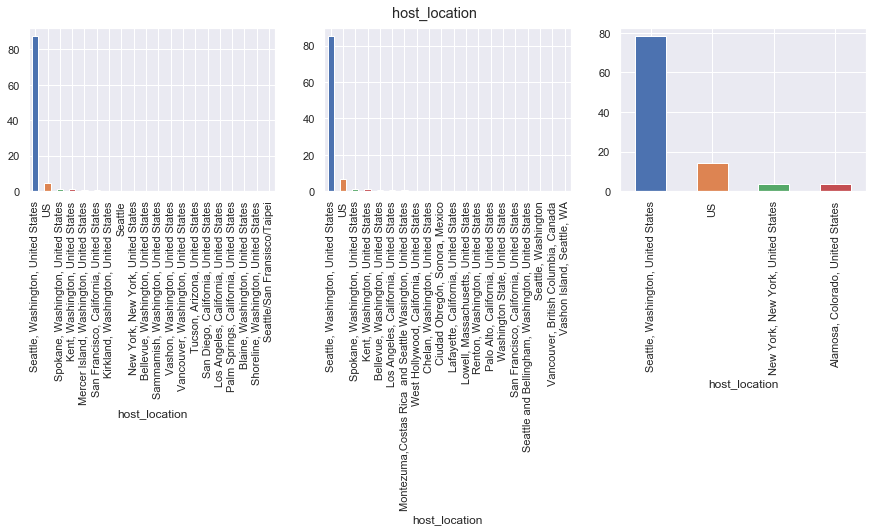

---------------------------------------------------------------------------------------------------------------------



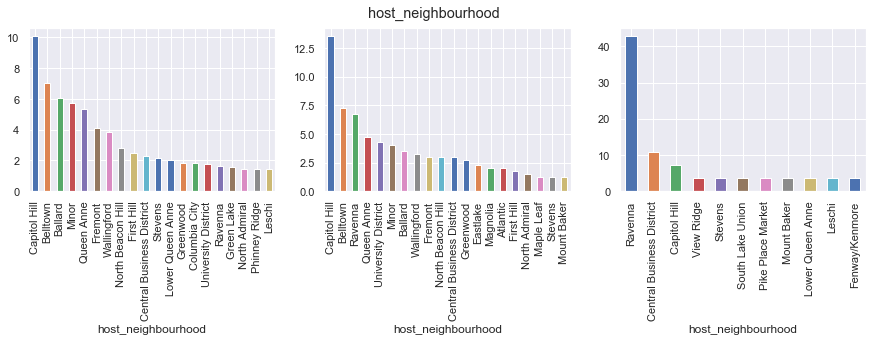

---------------------------------------------------------------------------------------------------------------------



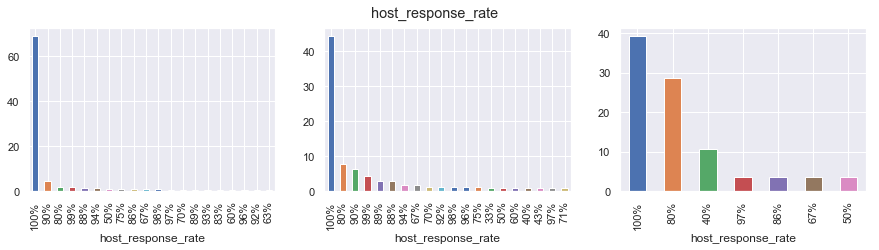

---------------------------------------------------------------------------------------------------------------------



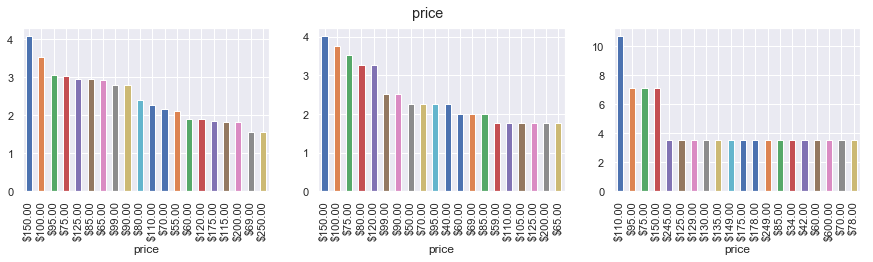

---------------------------------------------------------------------------------------------------------------------



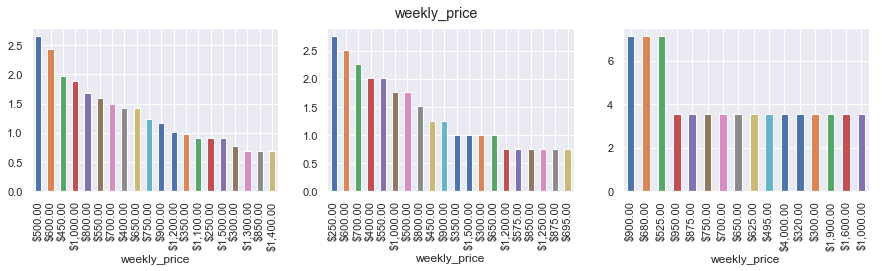

---------------------------------------------------------------------------------------------------------------------



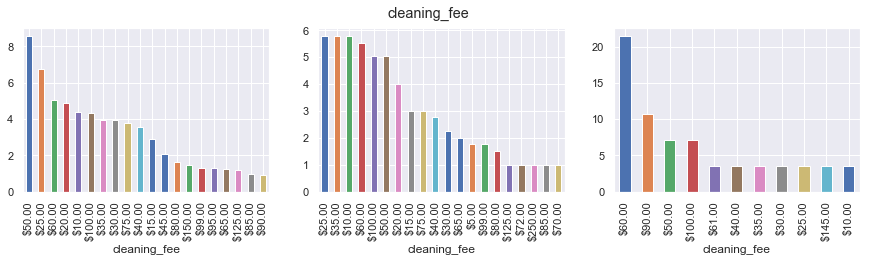

---------------------------------------------------------------------------------------------------------------------



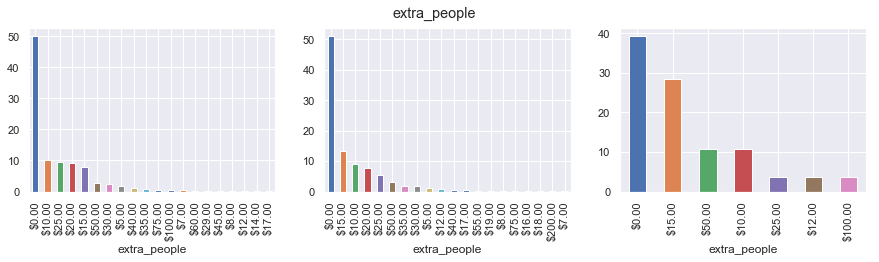

---------------------------------------------------------------------------------------------------------------------



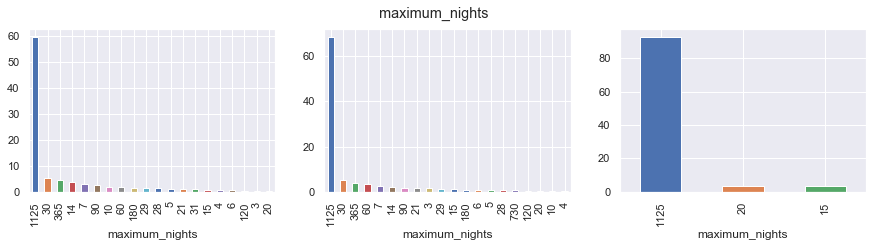

---------------------------------------------------------------------------------------------------------------------



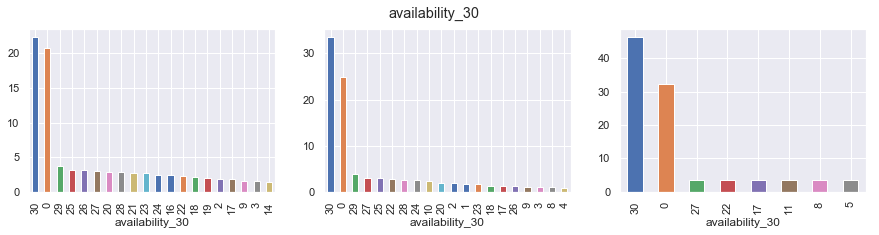

---------------------------------------------------------------------------------------------------------------------



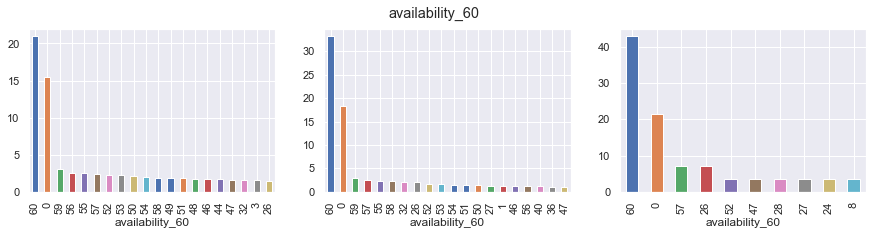

---------------------------------------------------------------------------------------------------------------------



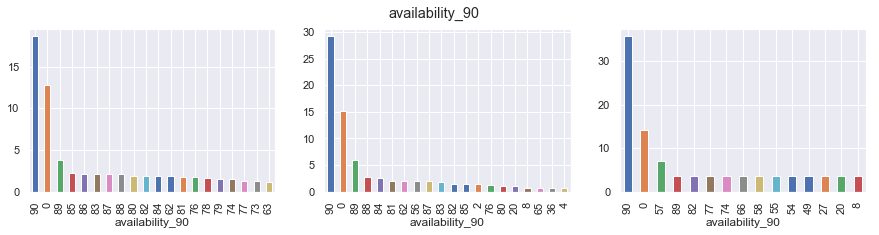

---------------------------------------------------------------------------------------------------------------------



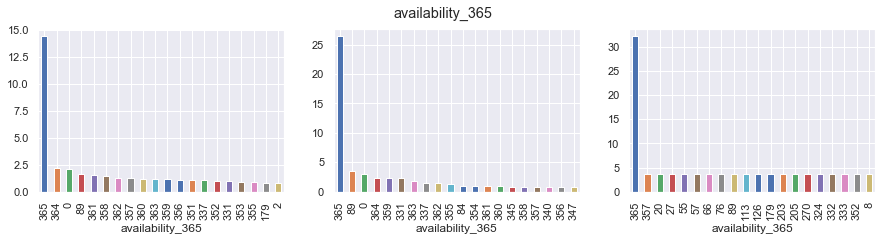

---------------------------------------------------------------------------------------------------------------------



In [46]:
## Creating a seperate dataframe for features with messy graphs. 
analylis2 = df_analysis.copy(deep=True)
analylis2a = analylis2[[   'host_location',
    'host_neighbourhood',
    'host_response_rate',
    'price',
    'weekly_price',
    'cleaning_fee',
    'extra_people',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'

]]

analylis2a_cols = analylis2a.columns

for cols in analylis2a_cols:
    fig, axs = plt.subplots(1,3, figsize=(15,3))
    fig.suptitle(cols)
    ((((high_review_scores.groupby(cols)['review_scores_rating'].count()) / high_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[0])
    ((((mid_review_scores.groupby(cols)['review_scores_rating'].count()) / mid_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[1])
    ((((low_review_scores.groupby(cols)['review_scores_rating'].count()) / low_review_scores.shape[0]) * 100).sort_values(ascending=False)[:20]).plot.bar( ax=axs[2])
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------------')
    print()

### Evaluation of Host Characterstics

**host_neighbourhood**: 
The most successful hosts were found in capital hill and Beltown. While the hosts with lower ratings were found(with a higher margin) in the Ravenna neighbourhood district. Further analysis may need to be done or other datasets to find why this trend has been observerd within these particular neighbourhoods. 


**host_response_rate:** 
The response rate of the highest rating airBnBs was 70% for 100% of responses in comparisionto ~50% and ~37% for the remaining airBnBs. 

This reveals an important characterstics of hosts with the highest rated airBnBs which is that they are very responsive. 


**extra_people:**  

50% The most popular airBnBs didn't charge for extra people which the remaing charged less than 10$. In comaprision to the other airBnBs which charged a higher slightly higher rate. 

**avaliablity(30,60,90, 365 ):**  

Accoridng to the airBnB website, avalaiblity refers to

#### "Your availability is when and how often you offer your experience, and it impacts how easily potential guests find your experience on Airbnb. Those settings are of course entirely up to you, and we hope the following tips on availability will provide some inspiration to help you reach your hosting goals."

Therefore it is understood that a host ought to have greater avaliablity slots so that his airBnB becomes popular. The results reinfornce this assumption as the number of airBnB that are unavaliable(i.e 0 days) for 30, 60, 90 and 365 days are lesser than that of airBnBs with average and lower ratings. 

Therefore the less avaliable slots a host offers, the less likely it is for him to get a good rating. 


## 3. How do the prices and the number of bookings fluctuate with regards to time. What are the trends observed within the airBnBs of the three different categories. 

### No of Booking avaliablities variatiton with time 

In [47]:
df_calander = pd.read_csv('./calendar.csv')
df_calander['date'] = pd.to_datetime(df_calander['date'])


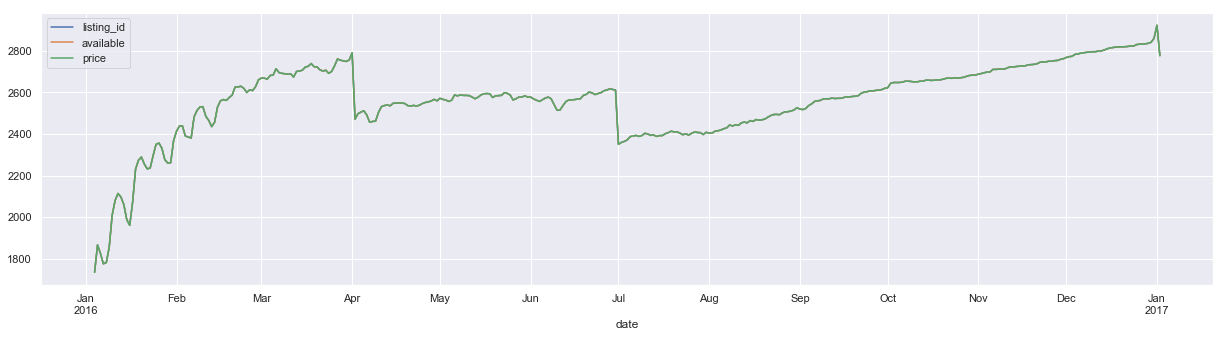

In [48]:
## isolate and extract the avaliable bookings
df_calander_avaliable = df_calander[df_calander['available'] == 't']
df_cal_a = df_calander_avaliable.groupby('date').count()
df_cal_a.plot.line(figsize=(21,5))

The time series shows that most of the listings were avaliable towards the end of March. They started increasing from Januwary onwards to March and then experienced a dip in April and remained constant untill end of June after which the avaliablity further decreased in July and which it contunued to gradually increase till January.  


The peak time of bookings therefore is in the month of March and the lowest is in the month of January. However the pontential host should considering doing a comparitive analysis on another dataset during the previous years to ensure that this pattern is consistant with the previous years and therefore reliable. 

### Price variatiton with time 

In [49]:
df_calander_price = df_calander.copy(deep=True)
df_calander_price.dropna(inplace=True)
df_calander_price['price'] = df_calander_price.price.replace('[\$,]', '', regex=True).astype(float)


In [50]:
df_cal_b = df_calander_price.groupby('date').mean()
#df_cal_b.drop(columns='listing_id').plot(figsize=(21,8))

In [51]:
#df_calander_price.listing_id

In [52]:
df_calander_price_high = df_calander_price[df_calander_price.listing_id.isin(high_review_scores.id) ]
df_calander_price_high = df_calander_price_high[['date', 'price']]
df_calander_price_high.dropna(inplace=True)
df_calander_price_high['price'] = df_calander_price_high.price.replace('[\$,]', '', regex=True).astype(float)
df_calander_price_high = df_calander_price_high.groupby('date').mean()
#df_calander_price_high.plot(figsize=(21,8))
#df_calander_price_high.head(1)

In [53]:
df_calander_price_mid = df_calander_price[df_calander_price.listing_id.isin(mid_review_scores.id) ]
df_calander_price_mid = df_calander_price_mid[['date', 'price']]
df_calander_price_mid.dropna(inplace=True)
df_calander_price_mid['price'] = df_calander_price_mid.price.replace('[\$,]', '', regex=True).astype(float)
df_calander_price_mid = df_calander_price_mid.groupby('date').mean()
#df_calander_price_mid.plot(figsize=(21,8))
#df_calander_price_mid.head(1)

In [54]:
df_calander_price_low = df_calander_price[df_calander_price.listing_id.isin(low_review_scores.id) ]
df_calander_price_low = df_calander_price_low[['date', 'price']]
df_calander_price_low.dropna(inplace=True)
df_calander_price_low['price'] = df_calander_price_low.price.replace('[\$,]', '', regex=True).astype(float)
df_calander_price_low = df_calander_price_low.groupby('date').mean()
#df_calander_price_low.plot(figsize=(21,8))

In [55]:
price_var_time = (pd.merge(pd.merge(df_calander_price_high,df_calander_price_mid,on='date'),df_calander_price_low,on='date'))
price_var_time.rename(index=str, columns={"price_x": "high", "price_y": "mid", "price": "low"}, inplace=True)

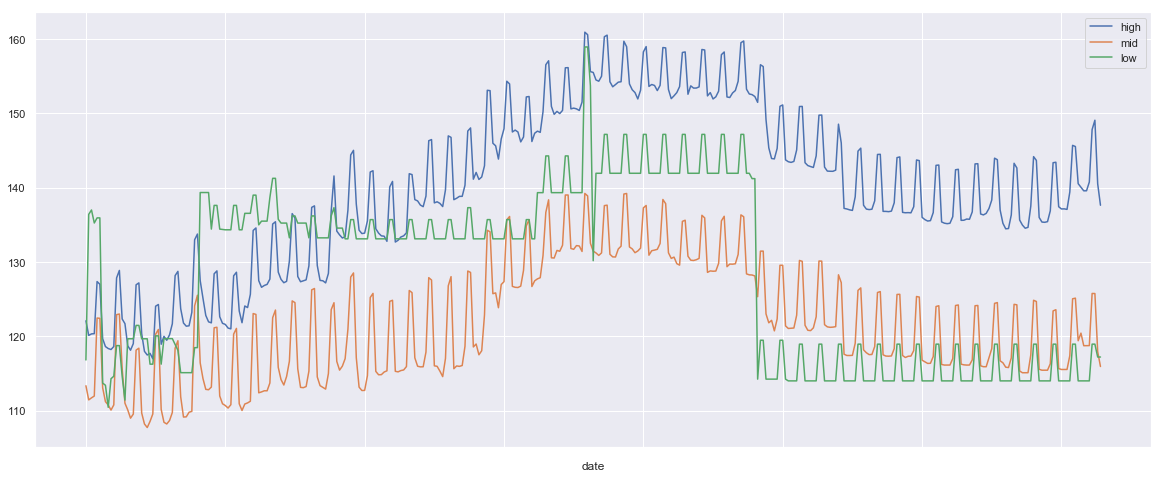

In [56]:
price_var_time.plot(figsize=(20,8))

### Evaluation of how price and bookings fluctuatie with time:

The above graphs shows the pattern of the changes in price for each category over the year. 

The results are revealing in the sense that for the airbnbs with the lowest ratings, the prices change rapidly and then stay constant, they are also on average higher than that of the airbnbs with average rating. It is notable that the prices of these AirBnBs are the highest in the beginning of the year when compared to the other two categories and the lowest in the 2nd half of the year. 

The airBnBs with the highest rating show a steady and gradual increase as the year begins till the months of June and July after they slowly start decreasing. The prices fluctuate little are change gradually with very little rapid changes. 

The airBnBs with the average rating follow a similar trend as of the the airBnBs with the higher ratings however on average the price range is lower than that of the higher rated AirBnBs

The results show that it is best if:
1. The prices change gradually with little fluctuations.
2. The ideal time to earn the highest revenue is during the months of May - July while the beginning of the year has the lowest prices. 
3. In order to stay competitive as well as earn profit, is it imperitive that the above mentioned trends/variations in prices in kept in mind. It would ensure that the airBnB remains compeitive and a lucrative offer to prospective host